# Diabetes Analysis

### Author: Ly Duc Trung

### Link: https://github.com/DucTrung1802/DS/blob/main/GLM_Report/diabetes_analysis.ipynb

### Dataset Link: https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## 0. Install and import libraries

### Check R version

In [447]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "4"

$minor
[1] "0.5"

$year
[1] "2021"

$month
[1] "03"

$day
[1] "31"

$`svn rev`
[1] "80133"

$language
[1] "R"

$version.string
[1] "R version 4.0.5 (2021-03-31)"

$nickname
[1] "Shake and Throw"

### 0.1. Install

In [448]:
# INSTALL THESE PACKAGES IN CONDA TERMINAL
# conda install r-corrplot
# conda install r-rcompanion
# conda install r-pcaPP
# conda install r-caret
# conda install r-gmodels
# conda install r-DescTools
# conda install r-epitools
# conda install r-ranger
# conda install r-psych
# conda install r-MASS

### 0.2. Import

In [449]:
library(corrplot)
library(rcompanion)
library(pcaPP)
library(caret)
library(gmodels)
library(DescTools)
library(ranger)
library(psych)
library(MASS)
library(pROC)
library(DHARMa)
library(dplyr)

## 1. Import Data

In [450]:
input_data = read.csv("diabetes_full_data.csv")

In [451]:
df = data.frame(input_data)

In [452]:
df

X,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,1,0,0,0,0,⋯,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,⋯,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,⋯,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,⋯,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,⋯,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,⋯,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,⋯,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,⋯,0,5,30,30,1,0,9,5,1,1


## 2. Data Preprocessing

### 2.0. Standardize column names

In [453]:
colnames(df)
# Column "X" should be changed to be a more meaningful name.

[1] "X"                    "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

In [454]:
colnames(df)[1] = "Index"

In [455]:
colnames(df)

[1] "Index"                "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

### 2.1. Mismatched data types

In [456]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

In [457]:
# All columns have correct data type

### 2.2. Mixed data values

In [458]:
# Example: (female, woman, man, male) => (male, female)

In [459]:
# This dataset contains only number data => No mixed data values

### 2.3. Missing data

#### 2.3.1 Null data

In [460]:
sum(is.na(df))

[1] 0

In [461]:
# This dataset has no missing values

#### 2.3.2 Missing data in specific columns

In [462]:
# We see that in column "Age", the value could have value of 14 
# which is Don’t know / Refused / Missing (_AGEG5YR - BRFSS)

In [463]:
nrow(subset(df, Age == 14))

[1] 0

In [464]:
# Conclusion: The dataset has no missing data.

In [465]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

### 2.4. Detect Numerical, Binary, Ordinal variables

In [466]:
numerical_cols = c("BMI", "MentHlth", "PhysHlth")
binary_cols = c("HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
               "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
               "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
               "DiffWalk", "Sex")
ordinal_cols = c("GenHlth", "Age", "Education", "Income")
response_col = "Diabetes_binary"

display_matrix = matrix(c(length(numerical_cols), length(binary_cols), length(ordinal_cols)), nrow = 3)
rownames(display_matrix) = c("numerical_cols", "binary_cols", "ordinal_cols")
colnames(display_matrix) = "Number of variable"
display_matrix

,Number of variable
numerical_cols,3
binary_cols,14
ordinal_cols,4


### 2.5. Data fractorization

In [471]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

In [467]:
colnames(df)

[1] "Index"                "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

In [468]:
if ("Index" %in% colnames(df))
{
    df = df[, !colnames(df) == "Index"]
}

In [469]:
colnames(df)

[1] "HighBP"               "HighChol"             "CholCheck"           
 [4] "BMI"                  "Smoker"               "Stroke"              
 [7] "HeartDiseaseorAttack" "PhysActivity"         "Fruits"              
[10] "Veggies"              "HvyAlcoholConsump"    "AnyHealthcare"       
[13] "NoDocbcCost"          "GenHlth"              "MentHlth"            
[16] "PhysHlth"             "DiffWalk"             "Sex"                 
[19] "Age"                  "Education"            "Income"              
[22] "Diabetes_binary"

In [476]:
factorized_df = df

for (col in binary_cols)
{
    factorized_df[, col] = factor(df[, col])
}

for (col in ordinal_cols)
{
    factorized_df[, col] = factor(df[, col], ordered = T)
}

factorized_df[, response_col] = factor(df[, response_col])

In [477]:
str(factorized_df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

## 3. Exploratory data analysis (EDA)

In [329]:
plot_stack_bar_2x2 = function(table_2x2)
{
    barplot(table_2x2, beside = TRUE, col = c("green", "red"))
    legend("topright", legend = rownames(table_2x2), fill = c("green", "red"))
}

### 3.1. Response variable analysis

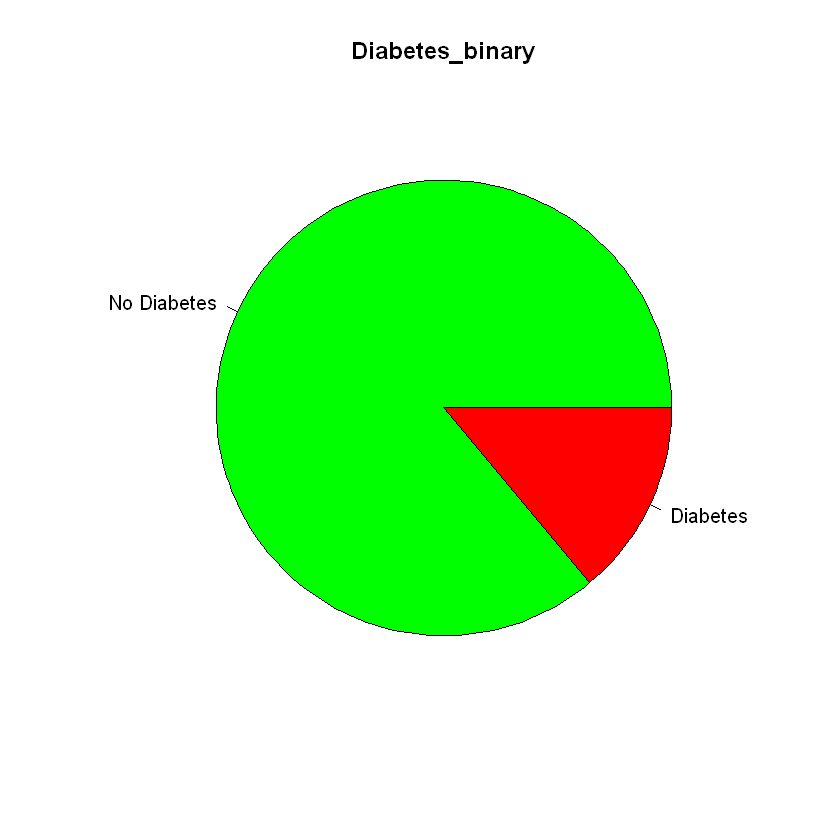

In [330]:
pie(table(df[,response_col]), main = response_col, col = c("green", "red"),
    labels = c("No Diabetes", "Diabetes"), )

In [331]:
nrow(df[df$Diabetes_binary == 1, ]) / nrow(df)

[1] 0.139333

In [332]:
with_diabetes_rows = which(df$Diabetes_binary == 1)
no_diabetes_rows = which(df$Diabetes_binary == 0)

### 3.2. Numerical variables analysis

In [333]:
# Numerical variables (3): BMI, MentHlth, PhysHlth

In [334]:
describeBy(df[,numerical_cols], df[,response_col])


 Descriptive statistics by group 
group: 0
         vars      n  mean   sd median trimmed  mad min max range skew kurtosis
BMI         1 218334 27.81 6.29     27   27.15 4.45  12  98    86 2.33    13.62
MentHlth    2 218334  2.98 7.11      0    0.94 0.00   0  30    30 2.86     7.37
PhysHlth    3 218334  3.64 8.06      0    1.30 0.00   0  30    30 2.50     5.00
           se
BMI      0.01
MentHlth 0.02
PhysHlth 0.02
------------------------------------------------------------ 
group: 1
         vars     n  mean    sd median trimmed  mad min max range skew kurtosis
BMI         1 35346 31.94  7.36     31   31.24 5.93  13  98    85 1.53     5.72
MentHlth    2 35346  4.46  8.95      0    2.02 0.00   0  30    30 2.06     2.87
PhysHlth    3 35346  7.95 11.30      1    6.19 1.48   0  30    30 1.15    -0.34
           se
BMI      0.04
MentHlth 0.05
PhysHlth 0.06

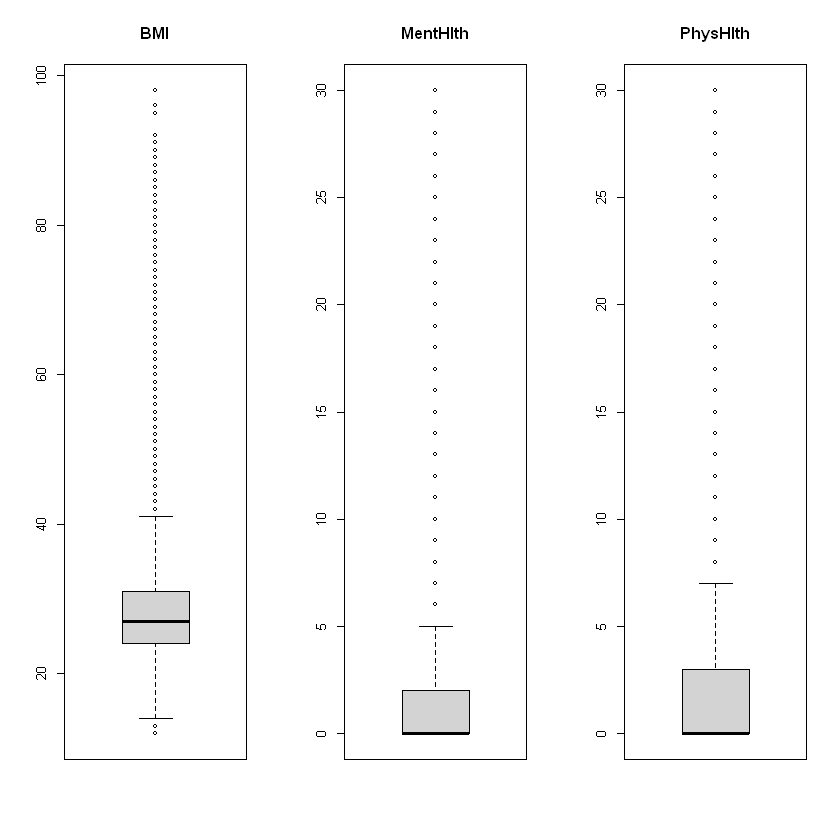

In [335]:
par(mfrow=c(1,3))
boxplot(df$BMI, main="BMI")
boxplot(df$MentHlth, main="MentHlth")
boxplot(df$PhysHlth, main="PhysHlth")

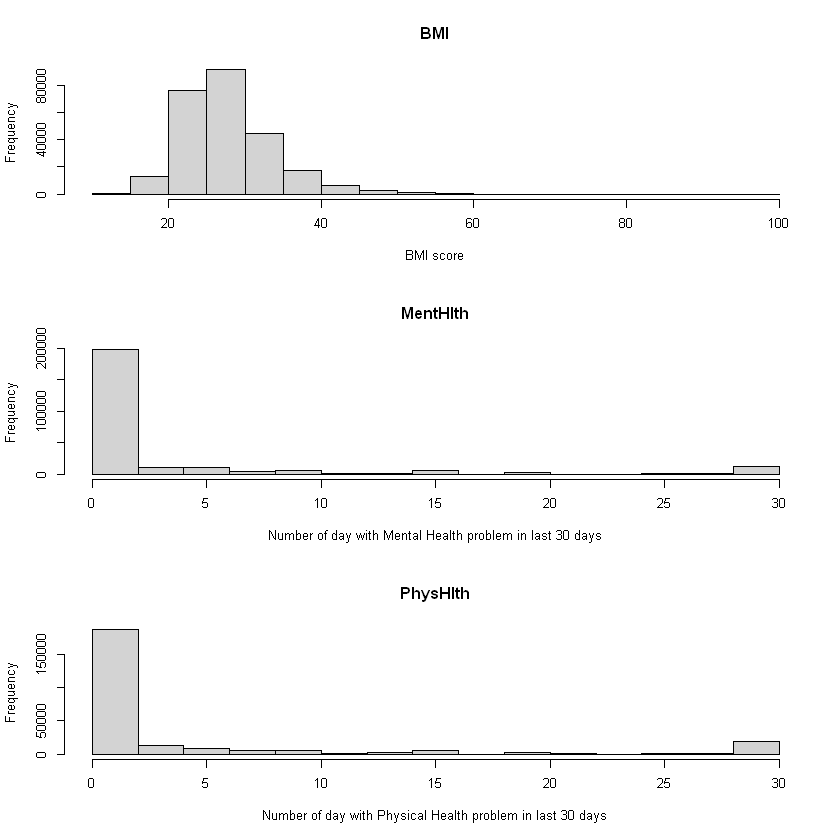

In [336]:
par(mfrow=c(3,1))
hist(df$BMI, main="BMI", xlab="BMI score")
hist(df$MentHlth, main="MentHlth", xlab="Number of day with Mental Health problem in last 30 days")
hist(df$PhysHlth, main="PhysHlth", xlab="Number of day with Physical Health problem in last 30 days")

#### 3.2.1. BMI

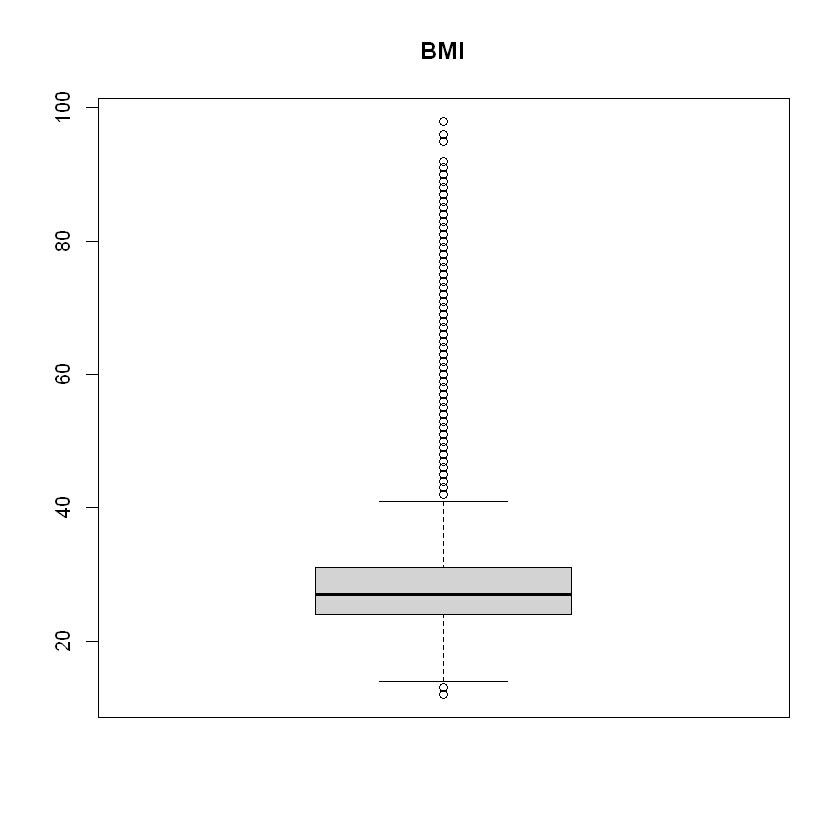

In [337]:
boxplot(df$BMI, main="BMI")

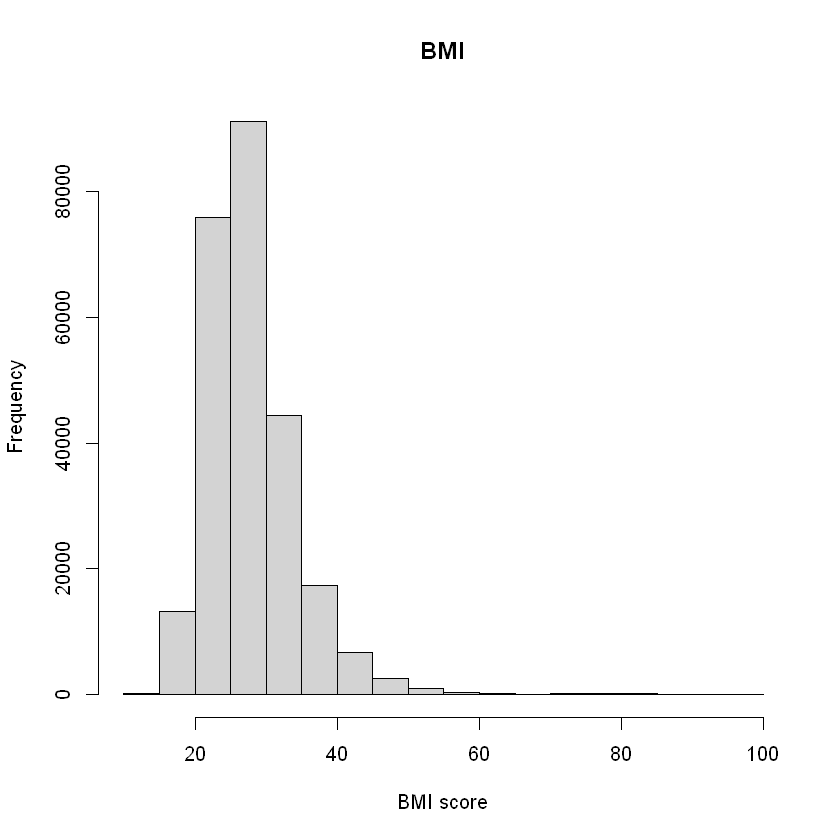

In [338]:
hist(df$BMI, main="BMI", xlab="BMI score")

##### Question 1: The percentage of diabetes people having BMI under 45 and over 45.

In [339]:
BMI_THRESH_HOLD = 45

In [340]:
BMI_table = table(ifelse(df$BMI > BMI_THRESH_HOLD, sprintf("BMI > %d", BMI_THRESH_HOLD), sprintf("BMI < %d", BMI_THRESH_HOLD)),
      ifelse(df$Diabetes_binary == 1, "diabetes", "no diabetes"))

In [341]:
BMI_table = BMI_table[, c(2, 1)]

In [342]:
BMI_table

          
           no diabetes diabetes
  BMI < 45      215209    33652
  BMI > 45        3125     1694

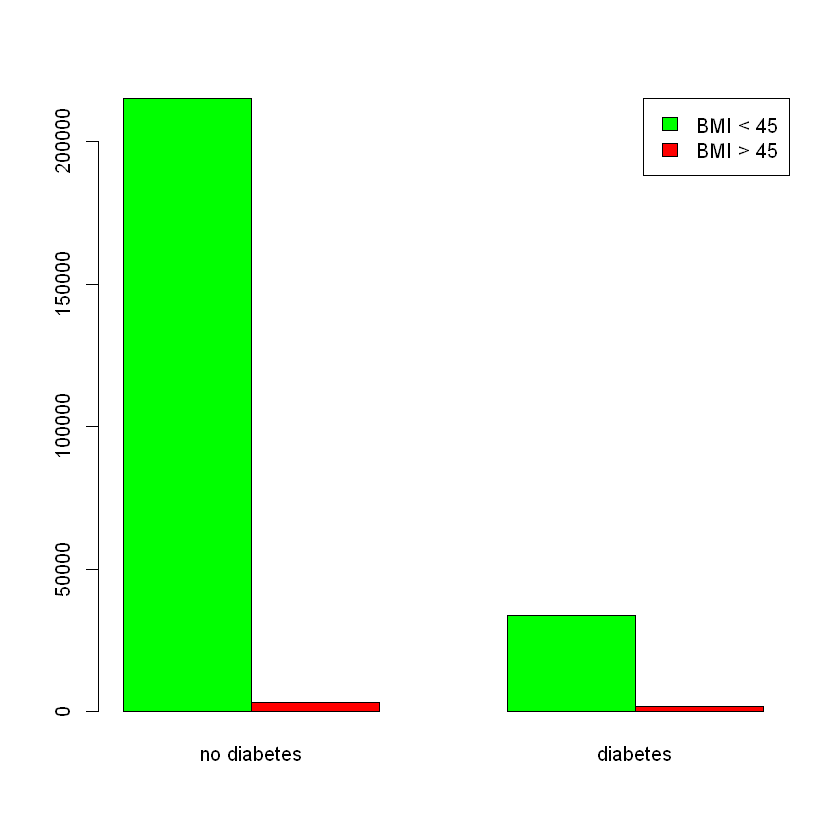

In [343]:
plot_stack_bar_2x2(BMI_table)

In [344]:
OddsRatio(BMI_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  3.466673   3.264004   3.681927

In [345]:
# odds ratio = 3.466 > 1
# People with BMI over 45 are 3.466 times more likely to have diabetes than others.
# => Create a binary variable that to distinguish people having BMI over 45.

In [346]:
if (! "BMI_over_45" %in% binary_cols)
{
    binary_cols = append(binary_cols, "BMI_over_45")
}

In [347]:
binary_cols

[1] "HighBP"               "HighChol"             "CholCheck"           
 [4] "Smoker"               "Stroke"               "HeartDiseaseorAttack"
 [7] "PhysActivity"         "Fruits"               "Veggies"             
[10] "HvyAlcoholConsump"    "AnyHealthcare"        "NoDocbcCost"         
[13] "DiffWalk"             "Sex"                  "BMI_over_45"

In [348]:
new_column = as.integer(ifelse(df$BMI > BMI_THRESH_HOLD, 1, 0))
BMI_index = which(colnames(df) == "BMI")
df = cbind(df[,1:BMI_index], BMI_over_45 = new_column, df[,(BMI_index+1):ncol(df)])

In [349]:
df

Index,HighBP,HighChol,CholCheck,BMI,BMI_over_45,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,0,1,0,0,0,⋯,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,0,1,0,0,1,⋯,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,0,⋯,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,0,1,⋯,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,0,1,⋯,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,0,1,0,0,1,⋯,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,0,1,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,0,1,0,0,1,⋯,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,0,1,0,1,0,⋯,0,5,30,30,1,0,9,5,1,1


##### Question 2: BMI distribution of no diabetes people and diabetes people.

In [350]:
summary(df[with_diabetes_rows,]$BMI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   27.00   31.00   31.94   35.00   98.00 

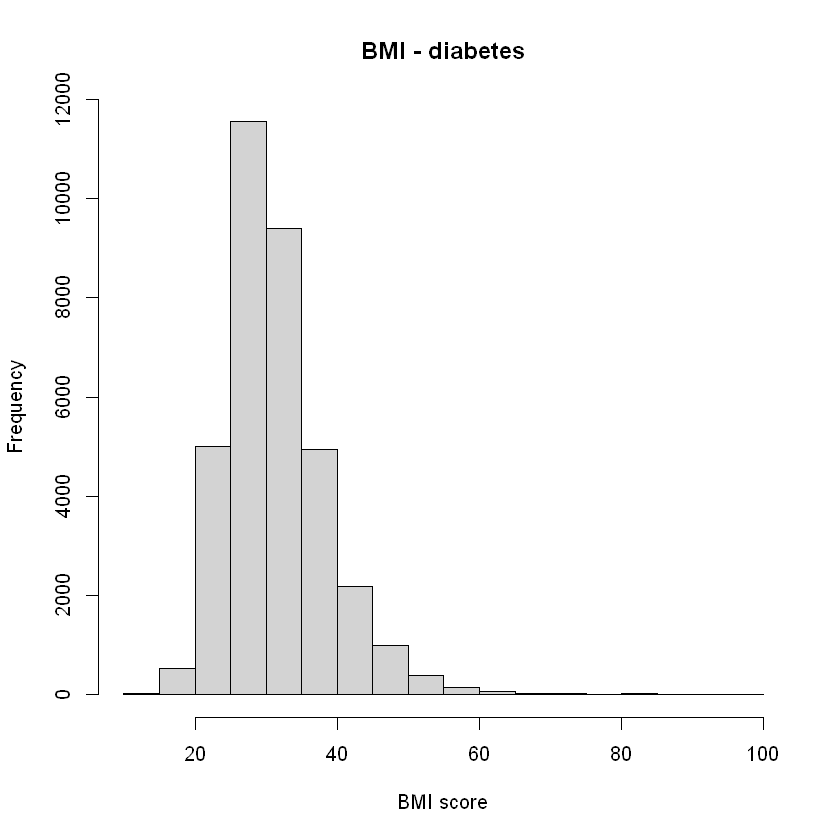

In [351]:
hist(df[with_diabetes_rows,]$BMI, main="BMI - diabetes", xlab="BMI score")

In [352]:
summary(df[no_diabetes_rows,]$BMI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   24.00   27.00   27.81   31.00   98.00 

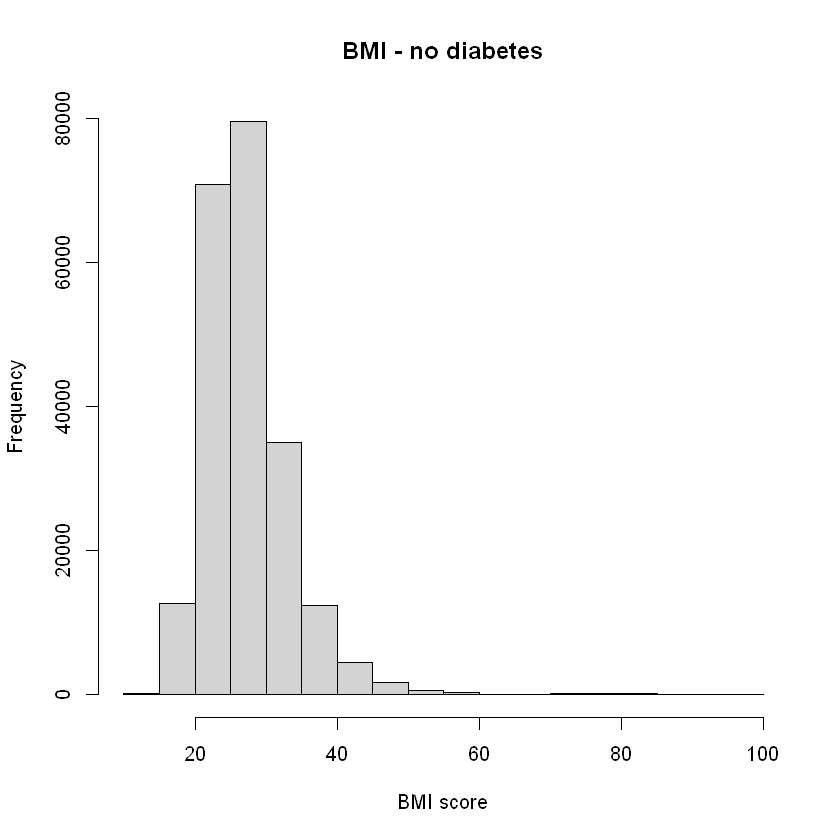

In [353]:
hist(df[no_diabetes_rows,]$BMI, main="BMI - no diabetes", xlab="BMI score")

#### 3.2.2. MentHlth

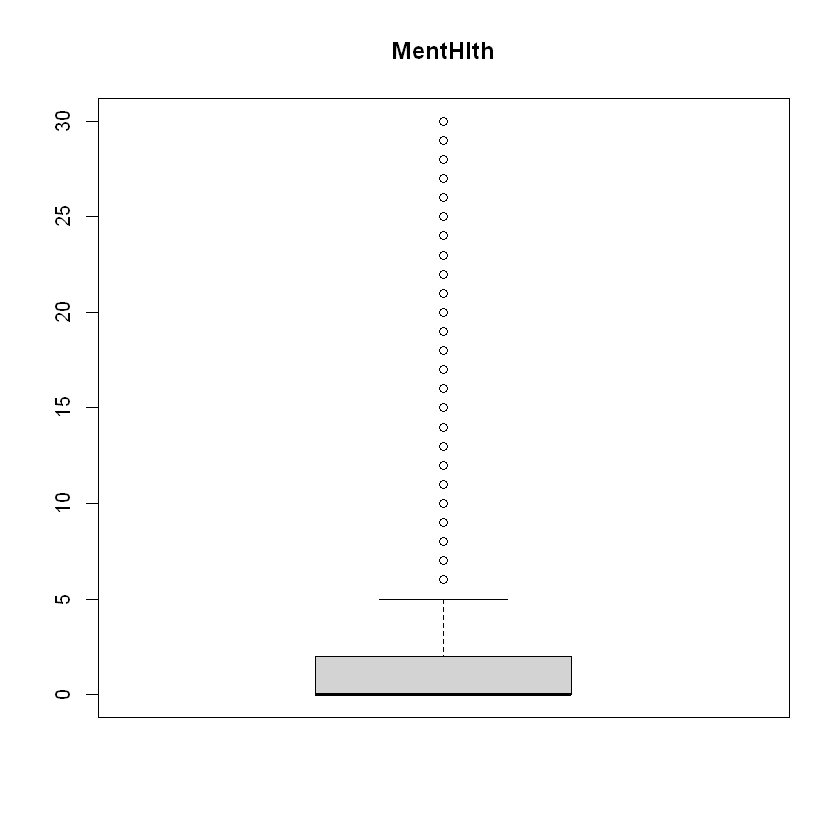

In [354]:
boxplot(df$MentHlth, main="MentHlth")

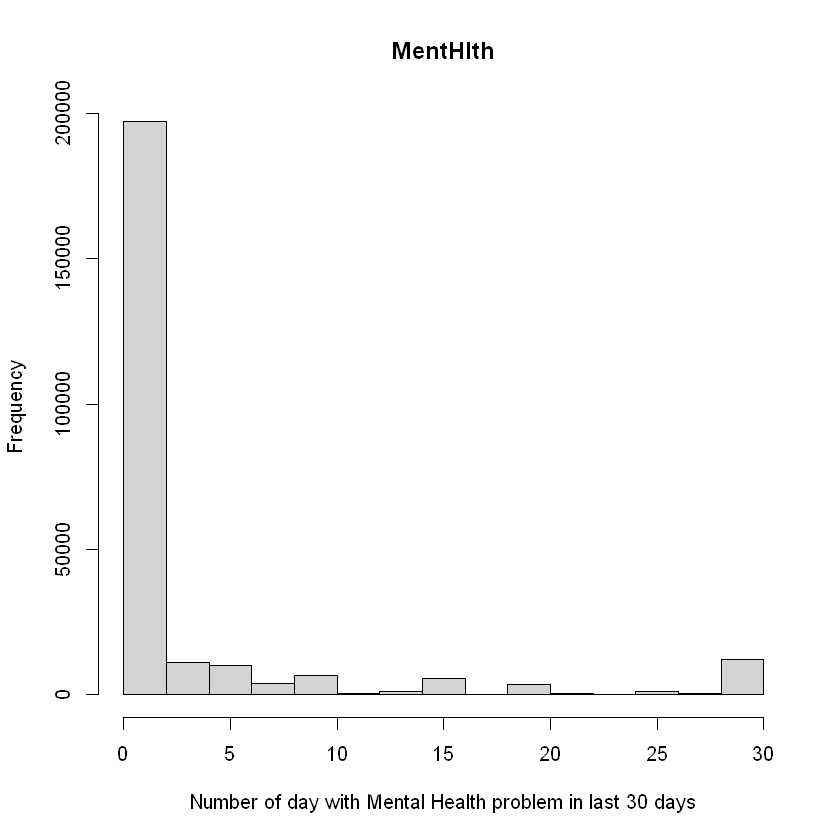

In [355]:
hist(df$MentHlth, main="MentHlth", xlab="Number of day with Mental Health problem in last 30 days")

##### Question 1: The percentage of diabetes people having MentHlth or not.

In [356]:
MentHlth_table = table(ifelse(df$MentHlth > 0, "have MentHlth", "no MentHlth"),
      ifelse(df$Diabetes_binary == 1, "diabetes", "no diabetes"))

In [357]:
MentHlth_table = Rev(MentHlth_table)

In [358]:
MentHlth_table

               
                no diabetes diabetes
  no MentHlth        152277    23403
  have MentHlth       66057    11943

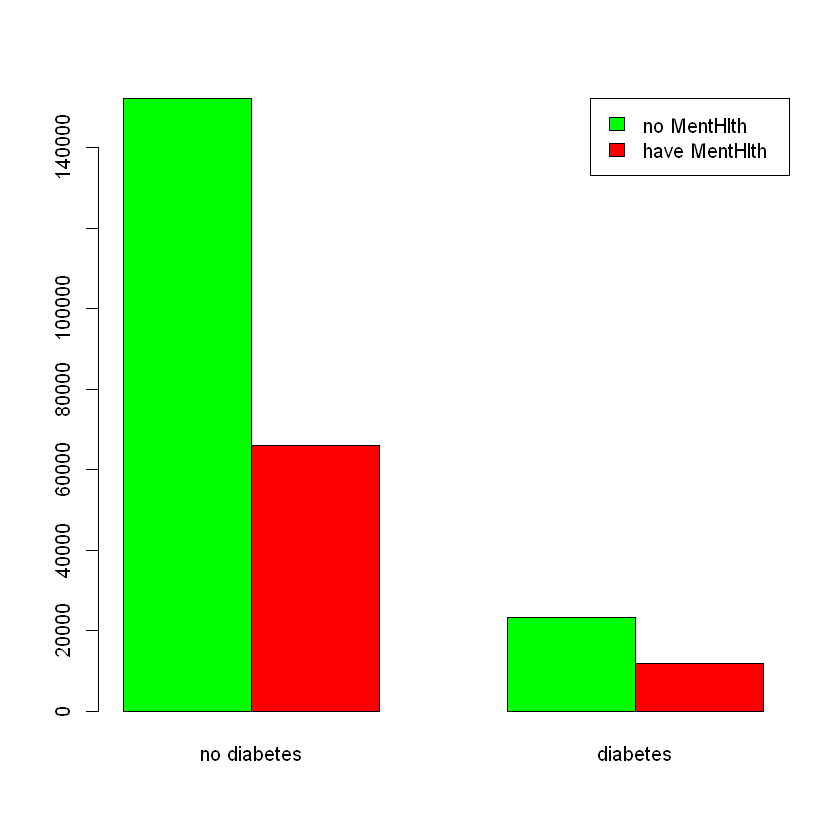

In [359]:
plot_stack_bar_2x2(MentHlth_table)

In [360]:
OddsRatio(MentHlth_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  1.176406   1.148673   1.204810

In [361]:
# Comment: odd ratio is close to 1
# => No creating new binary variable

#### 3.2.3. PhysHlth

In [362]:
PhysHlth_table = table(ifelse(df$PhysHlth > 0, "have PhysHlth", "no PhysHlth"),
      ifelse(df$Diabetes_binary == 1, "diabetes", "no diabetes"))

In [363]:
PhysHlth_table = Rev(PhysHlth_table)

In [364]:
PhysHlth_table

               
                no diabetes diabetes
  no PhysHlth        143312    16740
  have PhysHlth       75022    18606

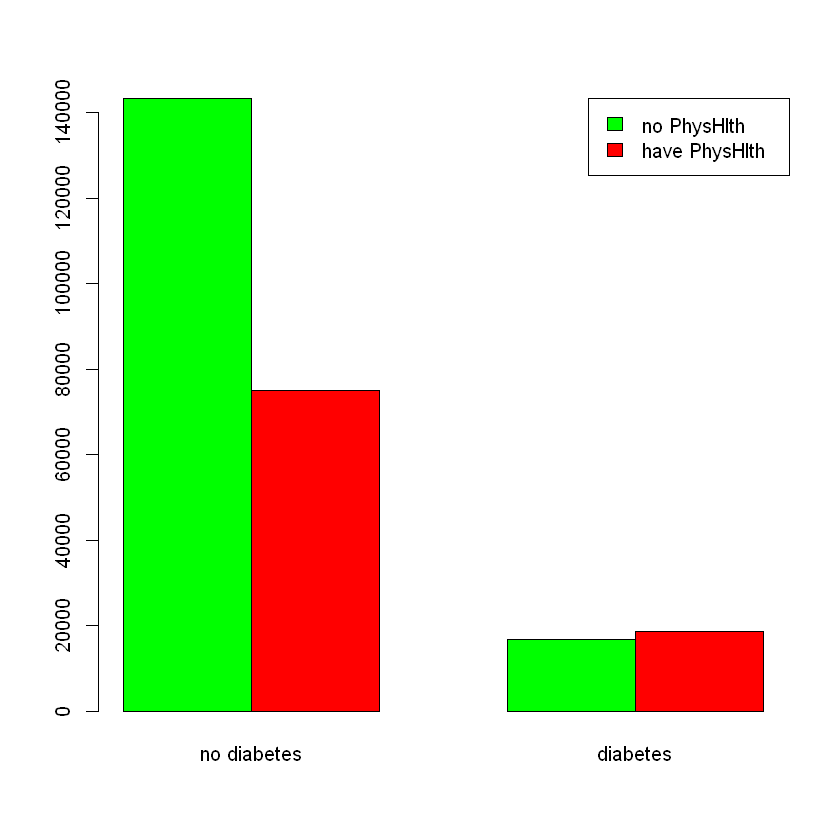

In [365]:
plot_stack_bar_2x2(PhysHlth_table)

In [366]:
OddsRatio(PhysHlth_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  2.123203   2.075610   2.171887

In [367]:
# odds ratio = 2.075 > 1
# People have PhysHlth are 2.075 times more likely to have diabetes than others.
# => Create a binary variable that to distinguish people having PhysHlth.

In [368]:
if (! "havePhysHlth" %in% binary_cols)
{
    binary_cols = append(binary_cols, "havePhysHlth")
}

In [369]:
binary_cols

[1] "HighBP"               "HighChol"             "CholCheck"           
 [4] "Smoker"               "Stroke"               "HeartDiseaseorAttack"
 [7] "PhysActivity"         "Fruits"               "Veggies"             
[10] "HvyAlcoholConsump"    "AnyHealthcare"        "NoDocbcCost"         
[13] "DiffWalk"             "Sex"                  "BMI_over_45"         
[16] "havePhysHlth"

In [370]:
new_column = as.integer(ifelse(df$PhysHlth > 0, 1, 0))
PhysHlth_index = which(colnames(df) == "PhysHlth")
df = cbind(df[,1:PhysHlth_index], havePhysHlth = new_column, df[,(PhysHlth_index+1):ncol(df)])

In [371]:
df

Index,HighBP,HighChol,CholCheck,BMI,BMI_over_45,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,⋯,GenHlth,MentHlth,PhysHlth,havePhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,0,1,0,0,0,⋯,5,18,15,1,1,0,9,4,3,0
1,0,0,0,25,0,1,0,0,1,⋯,3,0,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,0,⋯,5,30,30,1,1,0,9,4,8,0
3,1,0,1,27,0,0,0,0,1,⋯,2,0,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,0,1,⋯,2,3,0,0,0,0,11,5,4,0
5,1,1,1,25,0,1,0,0,1,⋯,2,0,2,1,0,1,10,6,8,0
6,1,0,1,30,0,1,0,0,0,⋯,3,0,14,1,0,0,9,6,7,0
7,1,1,1,25,0,1,0,0,1,⋯,3,0,0,0,1,0,11,4,4,0
8,1,1,1,30,0,1,0,1,0,⋯,5,30,30,1,1,0,9,5,1,1


### 3.3. Categorical - binary variables analysis

In [372]:
binary_cols

[1] "HighBP"               "HighChol"             "CholCheck"           
 [4] "Smoker"               "Stroke"               "HeartDiseaseorAttack"
 [7] "PhysActivity"         "Fruits"               "Veggies"             
[10] "HvyAlcoholConsump"    "AnyHealthcare"        "NoDocbcCost"         
[13] "DiffWalk"             "Sex"                  "BMI_over_45"         
[16] "havePhysHlth"

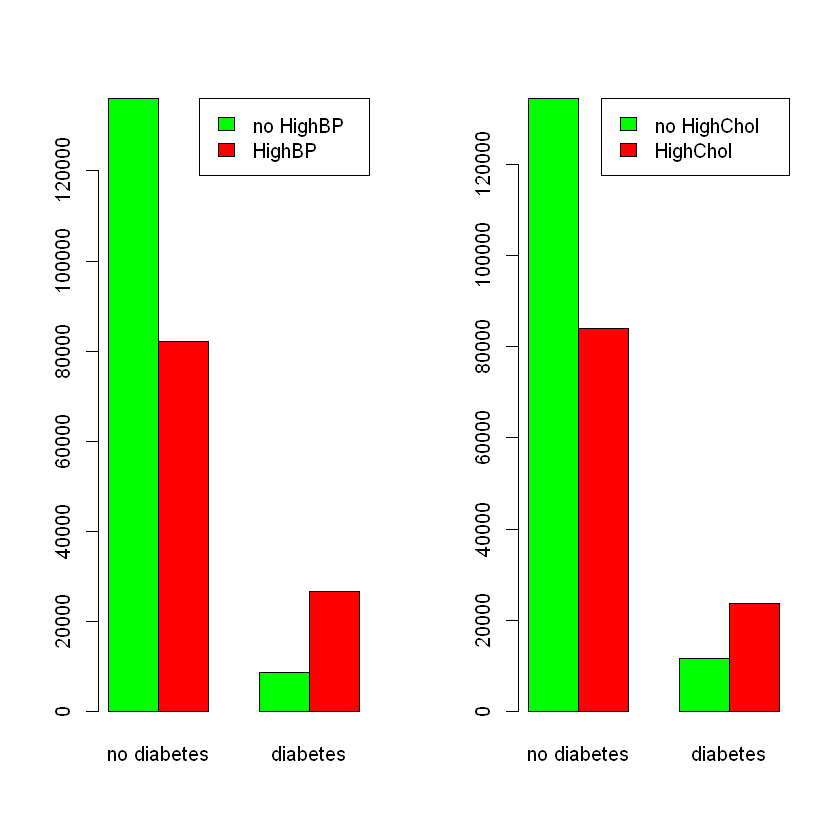

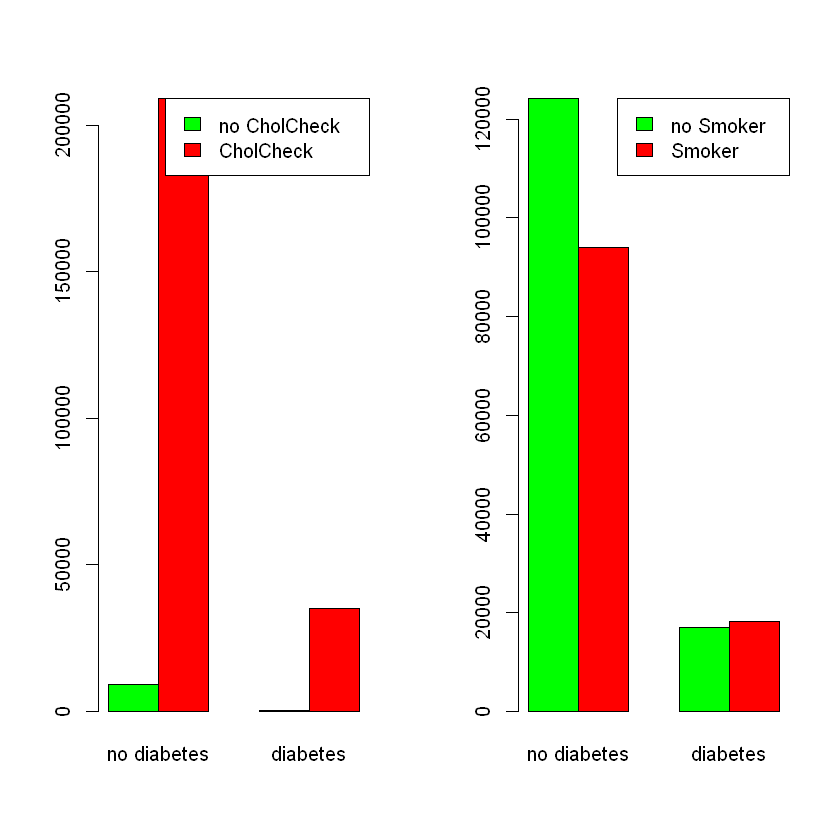

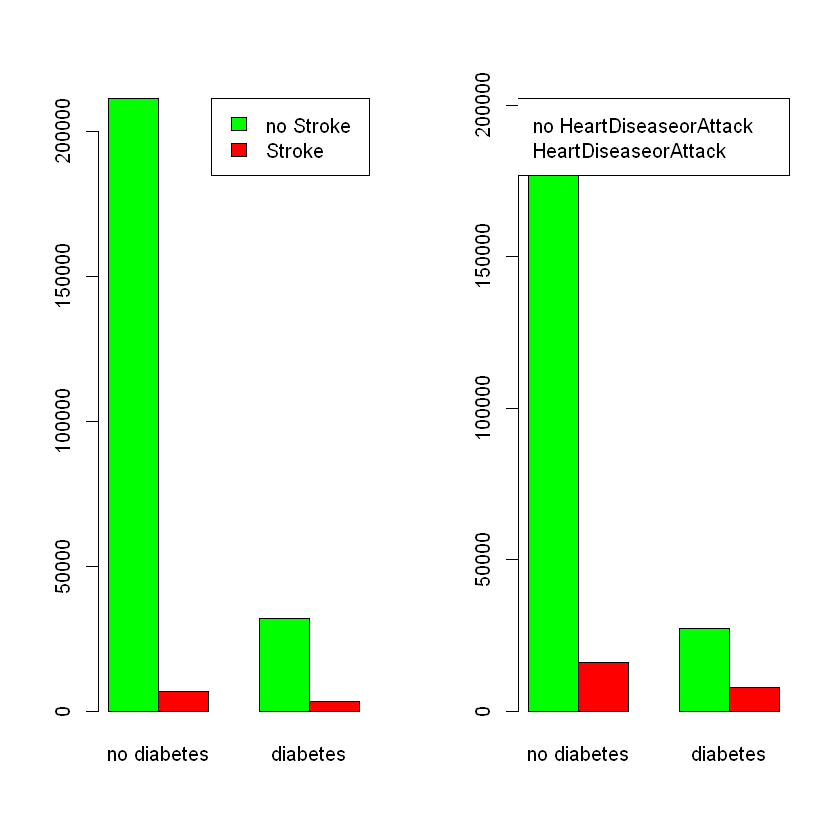

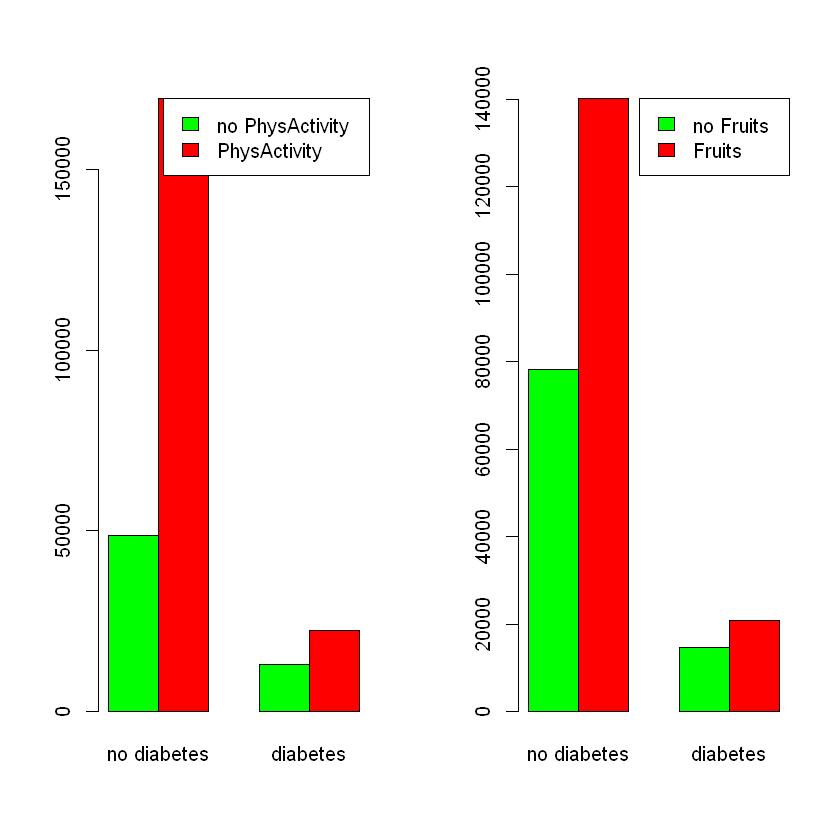

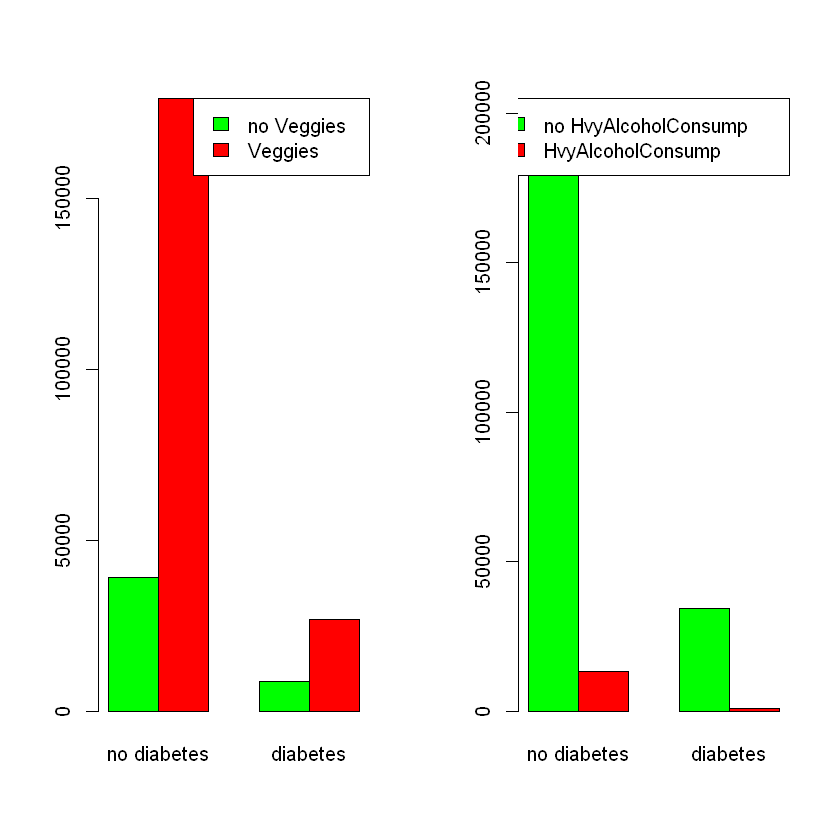

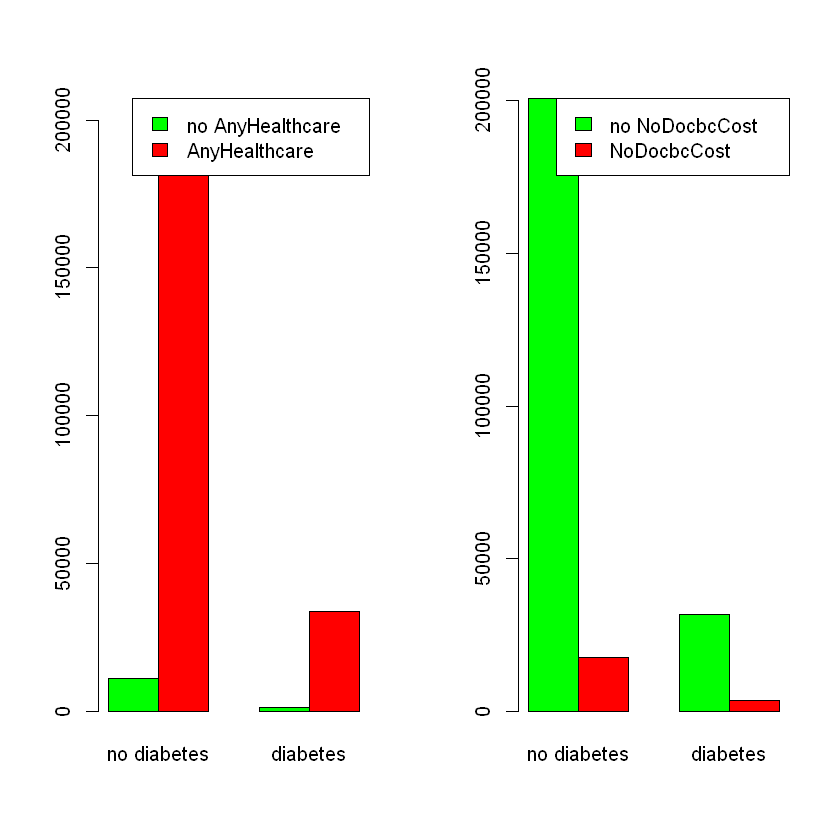

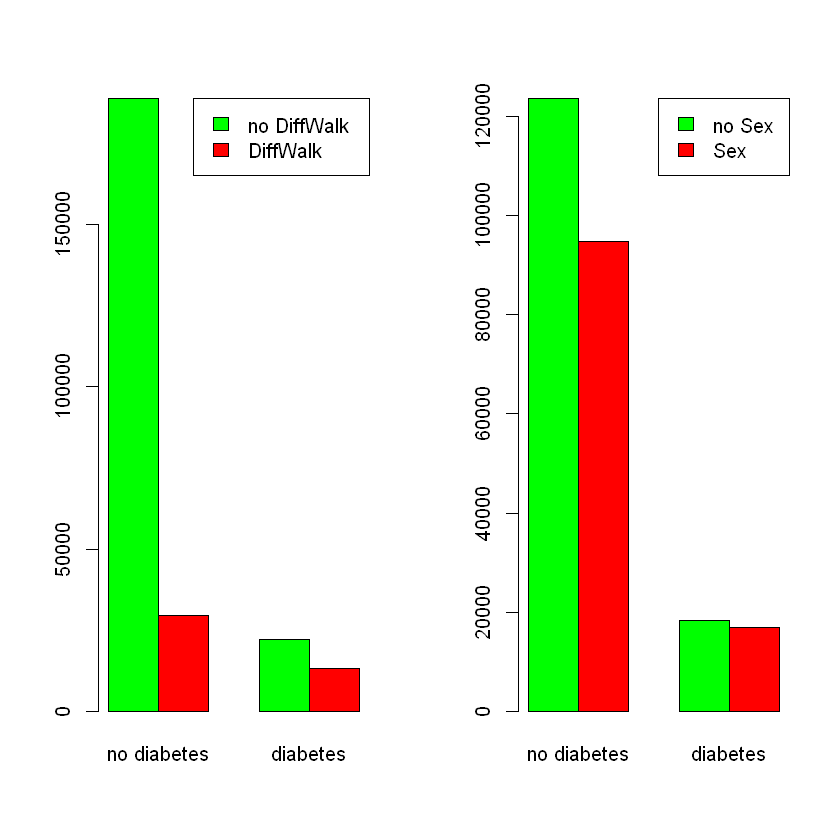

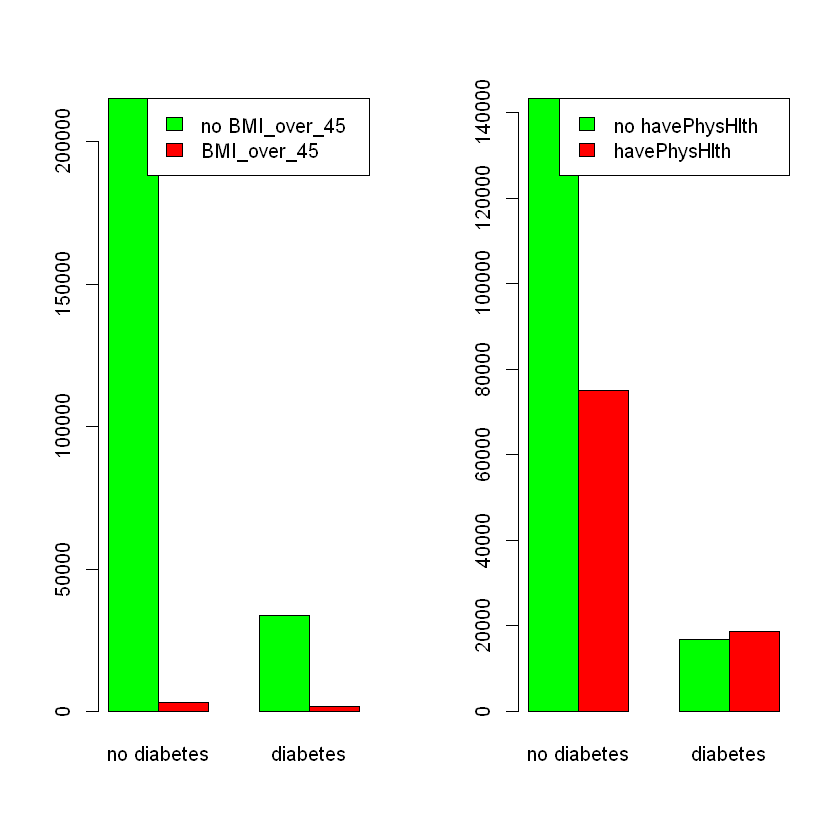

In [373]:
par(mfrow=c(1,2))
for (col in binary_cols)
{
    contingency_table = table(df[, col], df$Diabetes_binary)
    rownames(contingency_table) = c(sprintf("no %s", col), col)
    colnames(contingency_table) = c("no diabetes", "diabetes")
    plot_stack_bar_2x2(contingency_table)
}

In [374]:
summary_categorical_variables = function(df, explain_col, response_col, is.binary = T, prop.r = T,
                                        prop.c = T, prop.t = T)
{
    contingency_table = table(df[, explain_col], df[, response_col], dnn = c(explain_col, response_col))
    if (is.binary)
    {
        rownames(contingency_table) = c(paste("no", explain_col), explain_col)
        CrossTable(contingency_table, prop.r = prop.r, prop.c = prop.c, prop.t = prop.t, prop.chisq = FALSE, chisq = T)
        print("Odds Ratio")
        print(OddsRatio(contingency_table, conf.level = 0.95))
        print("Relative Risk")
        print(RelRisk(contingency_table, conf.level = 0.95, method = "wald"))
    }
    else
    {
        CrossTable(contingency_table, prop.r = prop.r, prop.c = prop.c, prop.t = prop.t, prop.chisq = FALSE, chisq = T)
    }
}

In [375]:
for (bin_col in binary_cols)
{
    summary_categorical_variables(df, bin_col, response_col)
}


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  253680 

 
             | Diabetes_binary 
      HighBP |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
   no HighBP |    136109 |      8742 |    144851 | 
             |     0.940 |     0.060 |     0.571 | 
             |     0.623 |     0.247 |           | 
             |     0.537 |     0.034 |           | 
-------------|-----------|-----------|-----------|
      HighBP |     82225 |     26604 |    108829 | 
             |     0.756 |     0.244 |     0.429 | 
             |     0.377 |     0.753 |           | 
             |     0.324 |     0.105 |           | 
-------------|-----------|-----------|-----------|
Column Total |    218334 |     35346 |    253680 | 
             |     0.861 |     0.139 |           | 
-----------

### 3.4. Categorical - ordinal variables analysis

In [376]:
ordinal_cols

[1] "GenHlth"   "Age"       "Education" "Income"

In [377]:
for (ord_col in ordinal_cols)
{
    summary_categorical_variables(df, ord_col, response_col, is.binary = F)
}


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  253680 

 
             | Diabetes_binary 
     GenHlth |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           1 |     44159 |      1140 |     45299 | 
             |     0.975 |     0.025 |     0.179 | 
             |     0.202 |     0.032 |           | 
             |     0.174 |     0.004 |           | 
-------------|-----------|-----------|-----------|
           2 |     82703 |      6381 |     89084 | 
             |     0.928 |     0.072 |     0.351 | 
             |     0.379 |     0.181 |           | 
             |     0.326 |     0.025 |           | 
-------------|-----------|-----------|-----------|
           3 |     62189 |     13457 |     75646 | 
             |     0.822 |     0.178 |     0.298 | 
           

#### 3.4.1. GenHlth

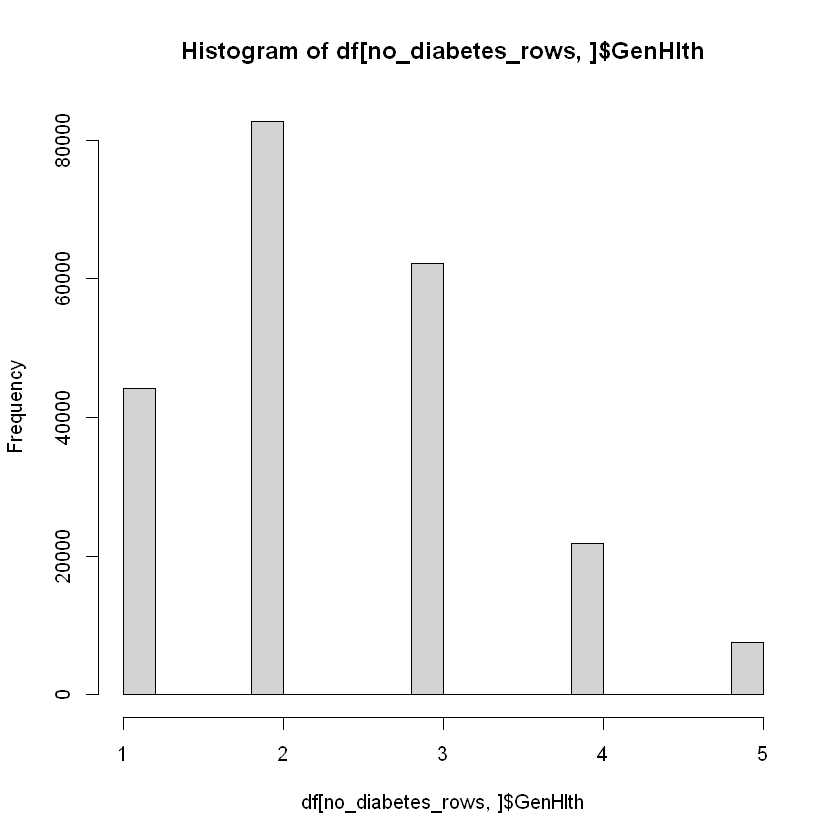

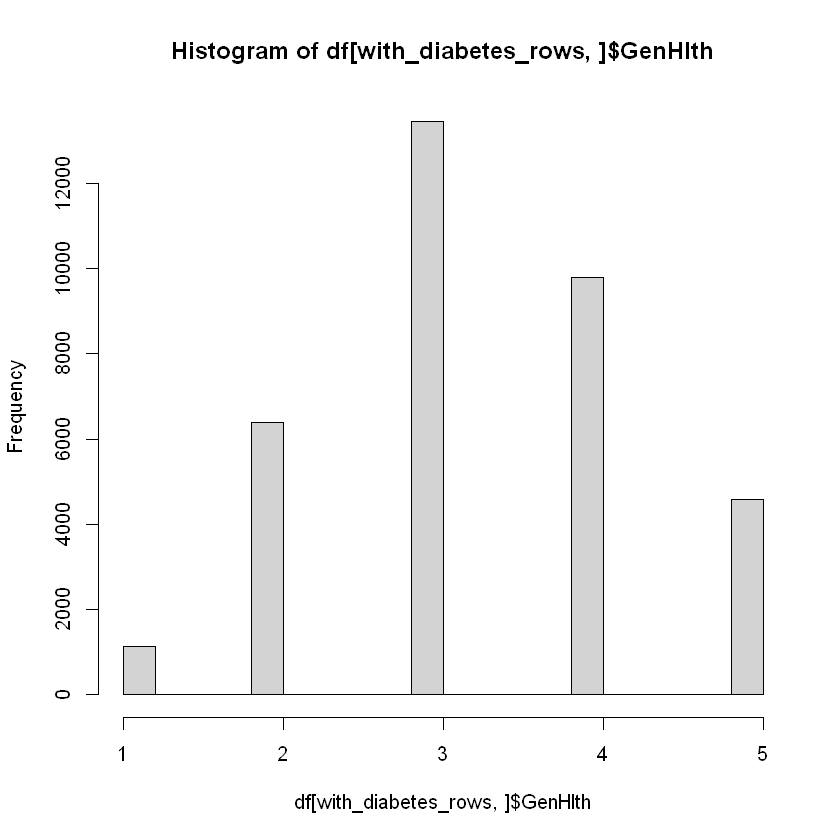

In [378]:
hist(df[no_diabetes_rows, ]$GenHlth)
hist(df[with_diabetes_rows, ]$GenHlth)

#### 3.4.2. Age

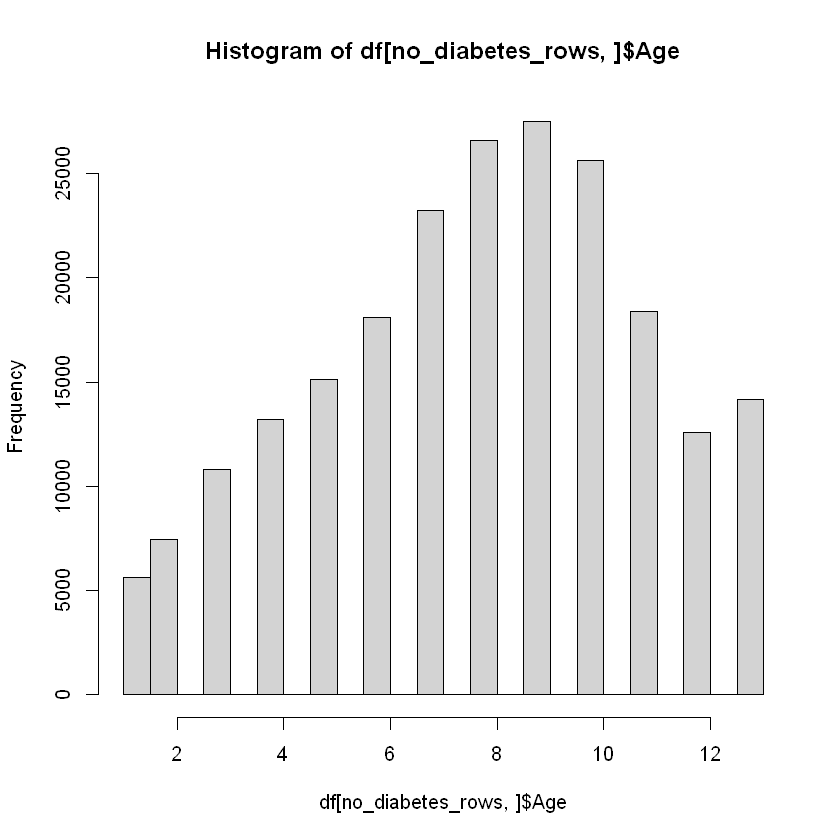

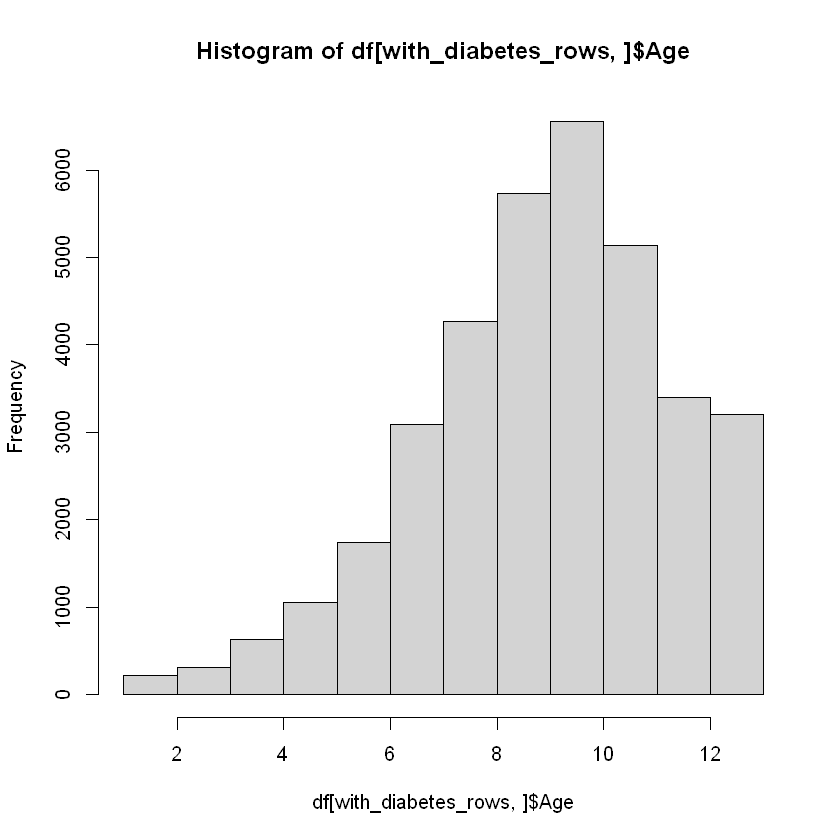

In [379]:
hist(df[no_diabetes_rows, ]$Age)
hist(df[with_diabetes_rows, ]$Age)

#### 3.4.3. Education

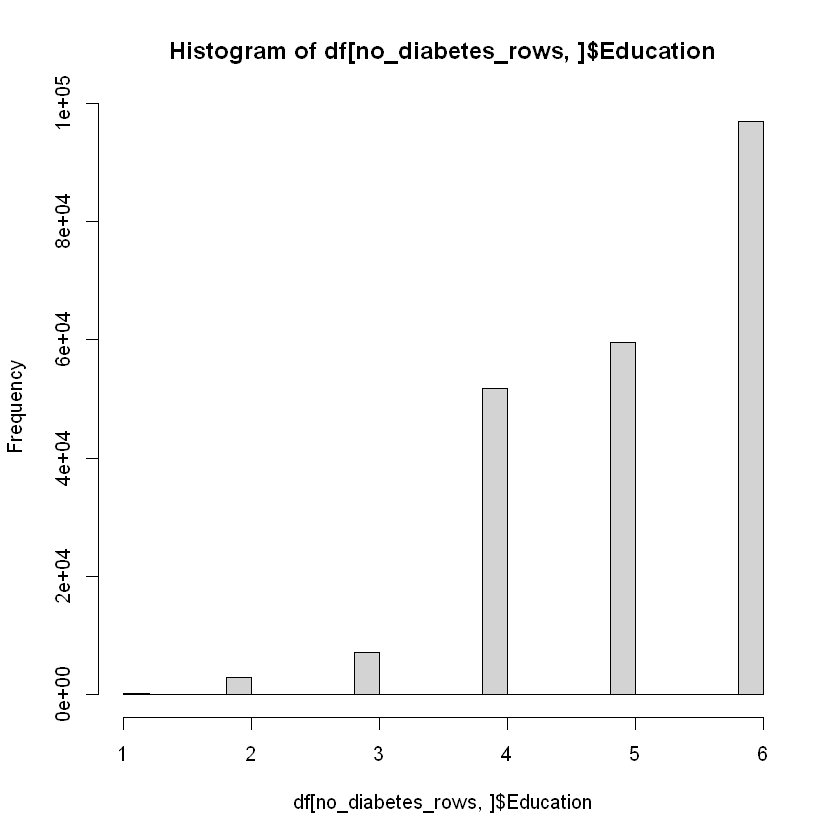

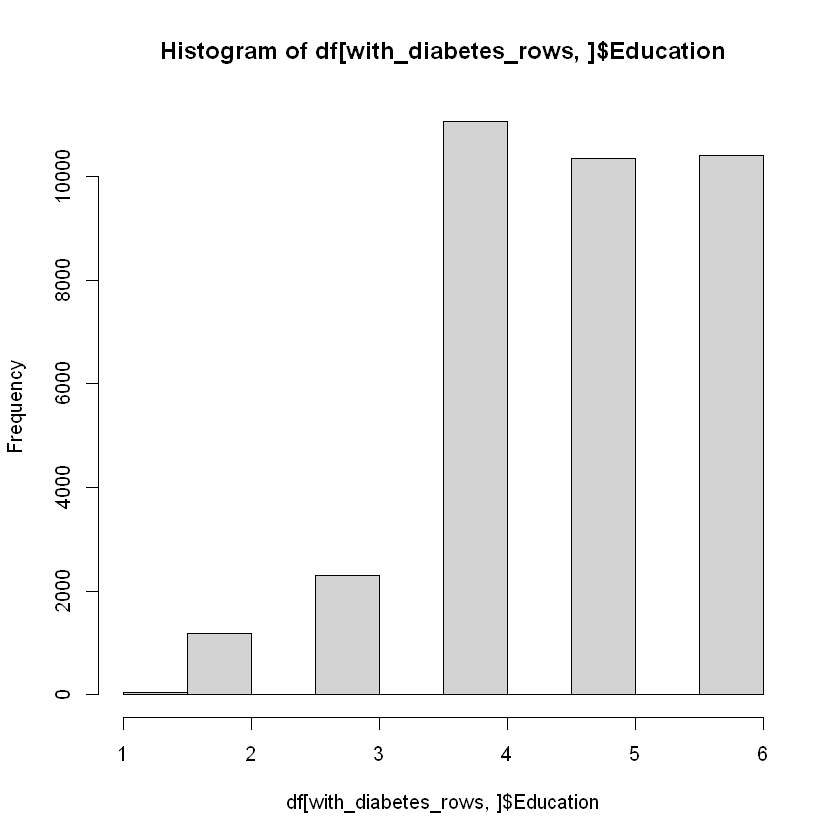

In [380]:
hist(df[no_diabetes_rows, ]$Education)
hist(df[with_diabetes_rows, ]$Education)

#### 3.4.4. Income

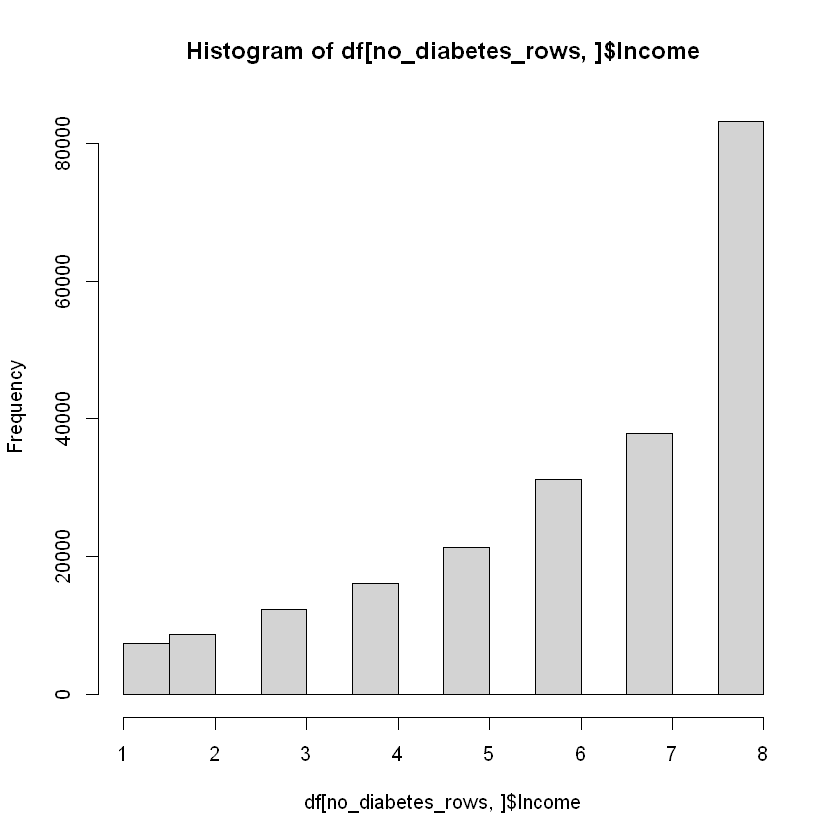

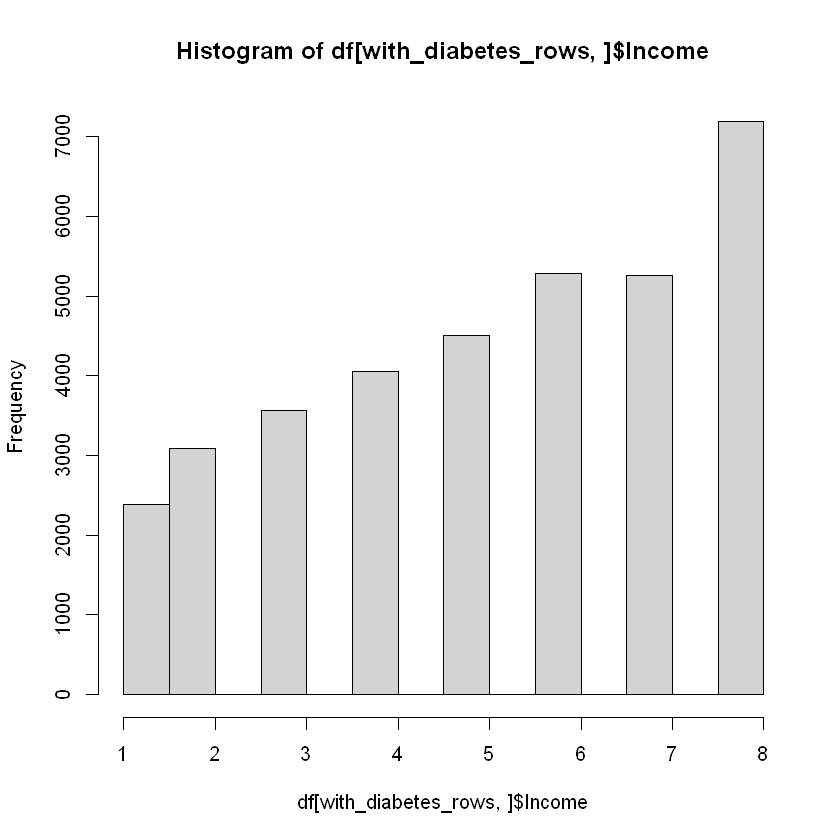

In [381]:
hist(df[no_diabetes_rows, ]$Income)
hist(df[with_diabetes_rows, ]$Income)

### 3.5. Correlation analysis

In [382]:
# One hot encoder all categorical columns before next step.

In [383]:
get_correlation = function(dataframe, col_1, col_2, numerical_cols, binary_cols, ordinal_cols, response_col)
{
    if (col_1 %in% ordinal_cols || col_2 %in% ordinal_cols)
    {
        return (cor.fk(dataframe[,col_1], dataframe[,col_2]))
    }
    else if (col_1 %in% numerical_cols && col_2 %in% c(binary_cols, response_col) ||
             col_1 %in% c(binary_cols, response_col) && col_2 %in% numerical_cols)
    {
        return (cor.test(dataframe[,col_1], dataframe[,col_2])$estimate)
    }
    else if (col_1 %in% c(binary_cols, response_col) && col_2 %in% c(binary_cols, response_col))
    {
        return (cramerV(table(dataframe[ ,c(col_1, col_2)])))
    }
    else if (col_1 %in% numerical_cols && col_2 %in% numerical_cols)
    {
        return (cor(dataframe[,col_1], dataframe[,col_2]))
    }
    else
    {
        return (0)
    }
}    

In [384]:
# get_correlation(df, "BMI", "PhysHlth", numerical_col, binary_col, ordinal_col)

In [385]:
all_colnames = colnames(df)[-1]

In [386]:
all_colnames

[1] "HighBP"               "HighChol"             "CholCheck"           
 [4] "BMI"                  "BMI_over_45"          "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "havePhysHlth"        
[19] "DiffWalk"             "Sex"                  "Age"                 
[22] "Education"            "Income"               "Diabetes_binary"

In [387]:
correlation_matrix = matrix(0, nrow = length(all_colnames), ncol = length(all_colnames), dimnames = list(all_colnames, all_colnames))

In [388]:
for (row_index in 1:nrow(correlation_matrix))
{
    for (col_index in row_index:ncol(correlation_matrix))
    {
        if (row_index == col_index)
        {
            correlation_matrix[row_index, col_index] = 1
        }
        else
        {
            correlation_matrix[row_index, col_index] = get_correlation(df, all_colnames[row_index],
                                                                       all_colnames[col_index], numerical_cols, 
                                                                       binary_cols, ordinal_cols, response_col)
        }
    }    
}

In [389]:
correlation_matrix

,HighBP,HighChol,CholCheck,BMI,BMI_over_45,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,GenHlth,MentHlth,PhysHlth,havePhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
HighBP,1,0.2982,0.09851,0.21374812,0.0611800,0.09699000,0.12960000,0.20940000,0.1253000,0.04055000,⋯,0.27684409,0.056455917,0.161211571,0.1239000,0.2236000,0.052210000,0.293883910,-0.132261074,-0.15907727,0.26310000
HighChol,0,1.0000,0.08564,0.10672208,0.0148500,0.09130000,0.09262000,0.18080000,0.0780500,0.04086000,⋯,0.19044111,0.062069154,0.121750528,0.1024000,0.1447000,0.031210000,0.227197645,-0.064141477,-0.07805095,0.20030000
CholCheck,0,0.0000,1.00000,0.03449509,0.0074480,0.00992900,0.02416000,0.04421000,0.0041900,0.02385000,⋯,0.04230765,-0.008365598,0.031774808,0.0258200,0.0405900,0.022120000,0.079782773,0.003605023,0.01355233,0.06476000
BMI,0,0.0000,0.00000,1.00000000,0.5439171,0.01380447,0.02015266,0.05290426,-0.1472936,-0.08751812,⋯,0.20044778,0.085310159,0.121141107,0.1156726,0.1970778,0.042950303,-0.018682591,-0.096272782,-0.06913474,0.21684306
BMI_over_45,0,0.0000,0.00000,0.00000000,1.0000000,0.00352400,0.00812200,0.01207000,0.0737300,0.02995000,⋯,0.09349140,0.063443762,0.083292441,0.0691400,0.1208000,0.032520000,-0.038714256,-0.035234766,-0.05948145,0.08527000
Smoker,0,0.0000,0.00000,0.00000000,0.0000000,1.00000000,0.06117000,0.11440000,0.0874000,0.07767000,⋯,0.14513867,0.092196474,0.116459714,0.0711700,0.1225000,0.093660000,0.101764840,-0.161695760,-0.11779172,0.06079000
Stroke,0,0.0000,0.00000,0.00000000,0.0000000,0.00000000,1.00000000,0.20300000,0.0691500,0.01339000,⋯,0.14940699,0.070171812,0.148944169,0.1039000,0.1766000,0.002978000,0.110086876,-0.067979132,-0.10985834,0.10580000
HeartDiseaseorAttack,0,0.0000,0.00000,0.00000000,0.0000000,0.00000000,0.00000000,1.00000000,0.0873000,0.01979000,⋯,0.22111285,0.064621292,0.181697536,0.1265000,0.2127000,0.086100000,0.194173045,-0.089351076,-0.12562478,0.17730000
PhysActivity,0,0.0000,0.00000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,1.0000000,0.14280000,⋯,-0.23388958,-0.125587088,-0.219229522,0.1420000,0.2532000,0.032480000,-0.075105057,0.186553009,0.17937530,0.11810000
Fruits,0,0.0000,0.00000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000,1.00000000,⋯,-0.09627343,-0.068217375,-0.044633325,0.0399800,0.0483500,0.091170000,0.057094063,0.107068517,0.06784869,0.04078000


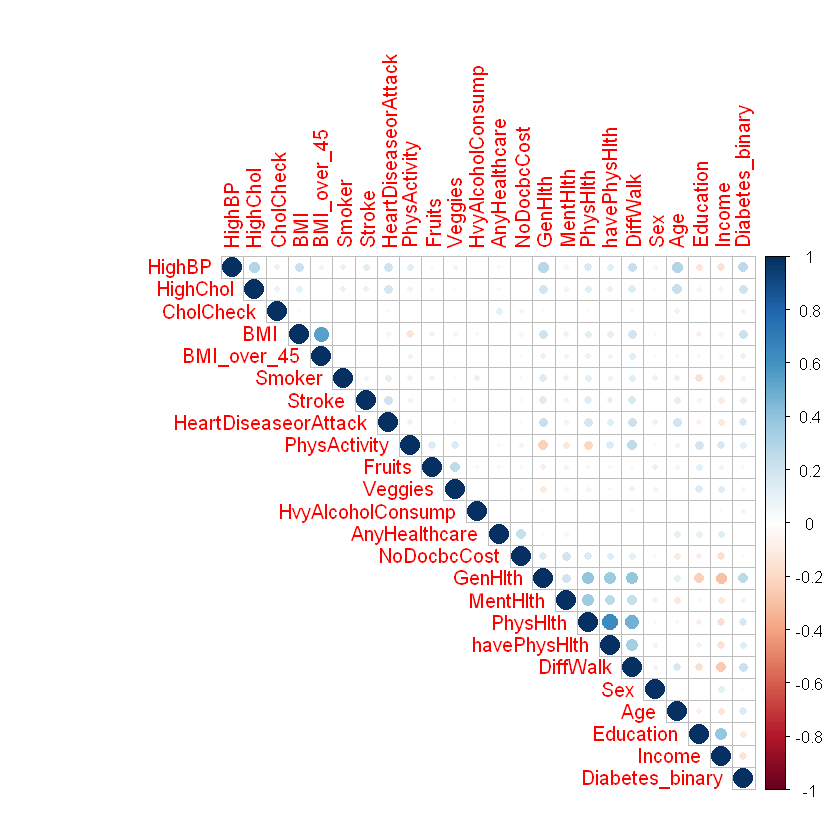

In [390]:
corrplot(correlation_matrix, method="circle", type="upper")

In [391]:
for (i in 1:nrow(correlation_matrix))
{
    print(c(rownames(correlation_matrix)[i], correlation_matrix[i, nrow(correlation_matrix)]))
}

[1] "HighBP" "0.2631"
[1] "HighChol" "0.2003"  
[1] "CholCheck" "0.06476"  
[1] "BMI"               "0.216843060203119"
[1] "BMI_over_45" "0.08527"    
[1] "Smoker"  "0.06079"
[1] "Stroke" "0.1058"
[1] "HeartDiseaseorAttack" "0.1773"              
[1] "PhysActivity" "0.1181"      
[1] "Fruits"  "0.04078"
[1] "Veggies" "0.05658"
[1] "HvyAlcoholConsump" "0.05706"          
[1] "AnyHealthcare" "0.01626"      
[1] "NoDocbcCost" "0.03143"    
[1] "GenHlth"           "0.262601954027565"
[1] "MentHlth"           "0.0693150826383553"
[1] "PhysHlth"          "0.171336700387252"
[1] "havePhysHlth" "0.1312"      
[1] "DiffWalk" "0.2183"  
[1] "Sex"     "0.03143"
[1] "Age"               "0.151562571648901"
[1] "Education"         "-0.11182832020598"
[1] "Income"             "-0.144998176285264"
[1] "Diabetes_binary" "1"              


## 4. Model building

### 4.1. Split data

In [392]:
set.seed(123)
index = createDataPartition(df$Diabetes_binary, p = 0.8, list = FALSE)
training_data = df[index, ]
testing_data = df[-index, ]

In [435]:
training_data

,Index,HighBP,HighChol,CholCheck,BMI,BMI_over_45,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,⋯,GenHlth,MentHlth,PhysHlth,havePhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,1,1,1,40,0,1,0,0,0,⋯,5,18,15,1,1,0,9,4,3,0
3,2,1,1,1,28,0,0,0,0,0,⋯,5,30,30,1,1,0,9,4,8,0
4,3,1,0,1,27,0,0,0,0,1,⋯,2,0,0,0,0,0,11,3,6,0
7,6,1,0,1,30,0,1,0,0,0,⋯,3,0,14,1,0,0,9,6,7,0
8,7,1,1,1,25,0,1,0,0,1,⋯,3,0,0,0,1,0,11,4,4,0
9,8,1,1,1,30,0,1,0,1,0,⋯,5,30,30,1,1,0,9,5,1,1
10,9,0,0,1,24,0,0,0,0,0,⋯,2,0,0,0,0,1,8,4,3,0
11,10,0,0,1,25,0,1,0,0,1,⋯,3,0,0,0,0,1,13,6,8,1
12,11,1,1,1,34,0,1,0,0,0,⋯,3,0,30,1,1,0,10,5,1,0


In [393]:
nrow(training_data)

[1] 202944

In [394]:
nrow(training_data[training_data$Diabetes_binary == 1, ]) / nrow(training_data)

[1] 0.1393439

In [395]:
nrow(testing_data)

[1] 50736

In [396]:
nrow(testing_data[testing_data$Diabetes_binary == 1, ]) / nrow(testing_data)

[1] 0.1392897

### 4.2. Features selection for model building

#### 4.2.1. Random forest method

In [397]:
rg.df = ranger(Diabetes_binary ~ ., data = training_data[, -1], importance = "impurity", num.trees = 100)
vimp_result = rg.df$variable.importance
sorted_vimp_result = vimp_result[order(vimp_result, decreasing = F)]

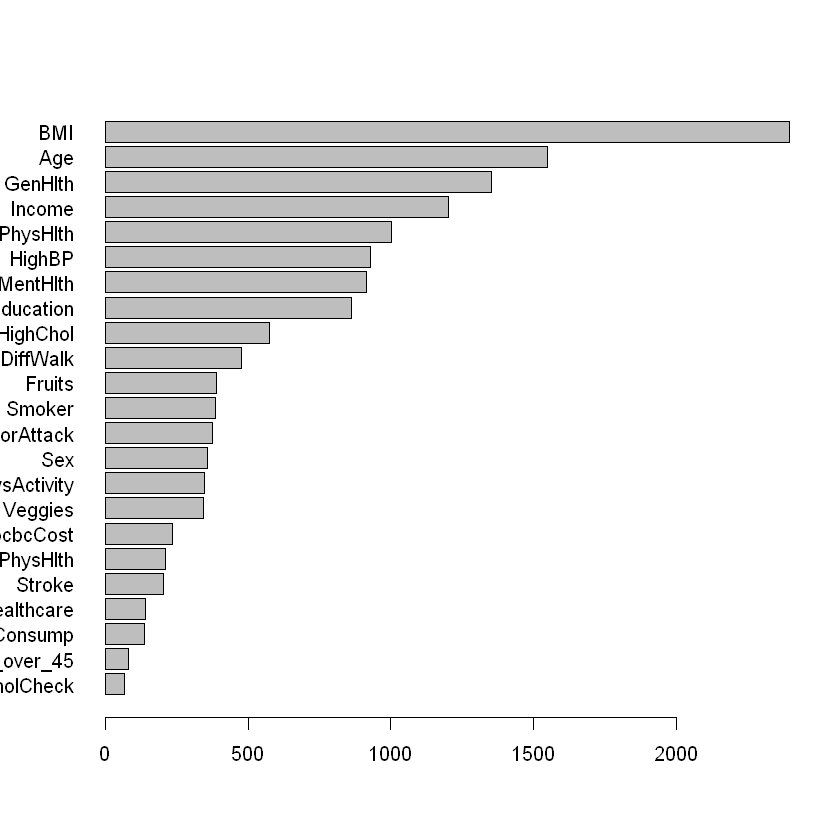

In [398]:
barplot(sorted_vimp_result, horiz = T, las = 1)

In [399]:
str(training_data)

'data.frame':	202944 obs. of  25 variables:
 $ Index               : int  0 2 3 6 7 8 9 10 11 12 ...
 $ HighBP              : int  1 1 1 1 1 1 0 0 1 0 ...
 $ HighChol            : int  1 1 0 0 1 1 0 0 1 0 ...
 $ CholCheck           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 28 27 30 25 30 24 25 34 26 ...
 $ BMI_over_45         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Smoker              : int  1 0 0 1 1 1 0 1 1 1 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 1 0 0 0 0 ...
 $ PhysActivity        : int  0 0 1 0 1 0 0 1 0 0 ...
 $ Fruits              : int  0 1 1 0 0 1 0 1 1 0 ...
 $ Veggies             : int  1 0 1 0 1 1 1 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 0 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 5 2 3 3 5 2 3 3 3 ...
 $ MentHlth            : int  18 30 0 0 0 30 0 0 0 0 ...
 $ PhysHlth           

#### 4.2.2. AIC and BIC methods

In [400]:
model = glm(Diabetes_binary ~ . , data = training_data, family = binomial)

#### AIC methods

In [401]:
# # AIC
# # Estimated runtime: 135s
aic_result = stepAIC(model, direction = "backward", k = 2)

Start:  AIC=129474.5
Diabetes_binary ~ Index + HighBP + HighChol + CholCheck + BMI + 
    BMI_over_45 + Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + 
    Fruits + Veggies + HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + 
    GenHlth + MentHlth + PhysHlth + havePhysHlth + DiffWalk + 
    Sex + Age + Education + Income

                       Df Deviance    AIC
- NoDocbcCost           1   129425 129473
- Index                 1   129425 129473
- Smoker                1   129425 129473
- Veggies               1   129426 129474
<none>                      129424 129474
- MentHlth              1   129433 129481
- Fruits                1   129433 129481
- PhysActivity          1   129433 129481
- AnyHealthcare         1   129434 129482
- havePhysHlth          1   129439 129487
- Education             1   129441 129489
- Stroke                1   129445 129493
- DiffWalk              1   129461 129509
- PhysHlth              1   129494 129542
- HeartDiseaseorAttack  1   129539 1

In [402]:
# Best AIC

# Code
# model = glm(Diabetes_binary ~ . , data = training_data, family = binomial)
# aic_result = stepAIC(model, direction = "backward", k = 2)

# Result
# Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
#     HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
#     AnyHealthcare + GenHlth + MentHlth + PhysHlth + DiffWalk + 
#     Sex + Age + Education + Income

# AIC: 129883.2

In [403]:
best_aic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
                     HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
                     AnyHealthcare + GenHlth + MentHlth + PhysHlth + DiffWalk + 
                     Sex + Age + Education + Income, data = training_data, family = binomial)

In [404]:
# Number of explain variables of AIC model
length(names(best_aic_model$coefficients)[-1])

[1] 18

#### BIC methods

In [405]:
# BIC
# Estimated runtime: 268s
bic_result = stepAIC(model, direction = "backward", k = log(nrow(training_data)))

Start:  AIC=129730
Diabetes_binary ~ Index + HighBP + HighChol + CholCheck + BMI + 
    BMI_over_45 + Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + 
    Fruits + Veggies + HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + 
    GenHlth + MentHlth + PhysHlth + havePhysHlth + DiffWalk + 
    Sex + Age + Education + Income

                       Df Deviance    AIC
- NoDocbcCost           1   129425 129718
- Index                 1   129425 129718
- Smoker                1   129425 129718
- Veggies               1   129426 129719
- MentHlth              1   129433 129726
- Fruits                1   129433 129726
- PhysActivity          1   129433 129726
- AnyHealthcare         1   129434 129728
<none>                      129424 129730
- havePhysHlth          1   129439 129732
- Education             1   129441 129734
- Stroke                1   129445 129738
- DiffWalk              1   129461 129755
- PhysHlth              1   129494 129787
- HeartDiseaseorAttack  1   129539 129

In [406]:
# Best BIC

# Code
# model = glm(Diabetes_binary ~ . , data = training_data, family = binomial)
# bic_result = stepAIC(model, direction = "backward", k = log(nrow(training_data)))

# Result
# Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
#     HeartDiseaseorAttack + Fruits + HvyAlcoholConsump + GenHlth + 
#     PhysHlth + DiffWalk + Sex + Age + Education + Income

# BIC: 130068.9

In [407]:
best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
                     HeartDiseaseorAttack + Fruits + HvyAlcoholConsump + GenHlth + 
                     PhysHlth + DiffWalk + Sex + Age + Education + Income, data = training_data, family = binomial)

In [408]:
# Number of explain variables of BIC model
length(names(best_bic_model$coefficients)[-1])

[1] 15

#### 4.2.3. Best model selection

In [122]:
# # Best AIC model
# best_aic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
#                      HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
#                      AnyHealthcare + GenHlth + MentHlth + PhysHlth + DiffWalk + 
#                      Sex + Age + Education + Income, data = training_data, family = binomial)

In [123]:
# # Best BIC model
# best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
#                      HeartDiseaseorAttack + Fruits + HvyAlcoholConsump + GenHlth + 
#                      PhysHlth + DiffWalk + Sex + Age + Education + Income, data = training_data, family=binomial)

In [409]:
anova(best_aic_model, best_bic_model, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,202925,129845.2,NA,NA,NA
2,202928,129873.4,-3,-28.13894,3.396137e-06


In [125]:
# => CHOOSE MODEL: "best_bic_model"

### 4.3. Link function selection

In [126]:
# best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
#                      HeartDiseaseorAttack + Fruits + HvyAlcoholConsump + GenHlth + 
#                      PhysHlth + DiffWalk + Sex + Age + Education + Income, data = training_data, family=binomial)

#### 4.3.1. Link function: logit

In [410]:
logit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + Fruits + HvyAlcoholConsump + 
    GenHlth + PhysHlth + havePhysHlth + DiffWalk + Sex + Age + 
    Education + Income, data = training_data, family = binomial(link = "logit"))
summary(logit_best_bic_model)


Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + BMI_over_45 + Stroke + HeartDiseaseorAttack + Fruits + 
    HvyAlcoholConsump + GenHlth + PhysHlth + havePhysHlth + DiffWalk + 
    Sex + Age + Education + Income, family = binomial(link = "logit"), 
    data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8974  -0.5331  -0.3136  -0.1732   3.4552  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -8.288682   0.102231 -81.078  < 2e-16 ***
HighBP                0.735136   0.016512  44.521  < 2e-16 ***
HighChol              0.568157   0.015188  37.408  < 2e-16 ***
CholCheck             1.274602   0.077185  16.514  < 2e-16 ***
BMI                   0.076287   0.001251  60.976  < 2e-16 ***
BMI_over_45          -0.977151   0.049327 -19.810  < 2e-16 ***
Stroke                0.127387   0.027958   4.556 5.20e-06 ***
HeartDiseaseorAttack  0.212869   0.019889  10.703  < 2e-16 

#### 4.3.2. Link function: probit

In [411]:
probit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + Fruits + HvyAlcoholConsump + 
    GenHlth + PhysHlth + havePhysHlth + DiffWalk + Sex + Age + 
    Education + Income, data = training_data, family = binomial(link = "probit"))
summary(probit_best_bic_model)


Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + BMI_over_45 + Stroke + HeartDiseaseorAttack + Fruits + 
    HvyAlcoholConsump + GenHlth + PhysHlth + havePhysHlth + DiffWalk + 
    Sex + Age + Education + Income, family = binomial(link = "probit"), 
    data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0131  -0.5486  -0.3069  -0.1394   3.9043  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -4.5267963  0.0516237 -87.688  < 2e-16 ***
HighBP                0.3875133  0.0087915  44.078  < 2e-16 ***
HighChol              0.3055687  0.0082613  36.988  < 2e-16 ***
CholCheck             0.6354588  0.0364101  17.453  < 2e-16 ***
BMI                   0.0423017  0.0007007  60.369  < 2e-16 ***
BMI_over_45          -0.5374998  0.0285703 -18.813  < 2e-16 ***
Stroke                0.0821987  0.0163869   5.016 5.27e-07 ***
HeartDiseaseorAttack  0.1373924  0.0116207  11.823

#### 4.3.3. Link function: cauchit

In [412]:
cauchit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + Fruits + HvyAlcoholConsump + 
    GenHlth + PhysHlth + havePhysHlth + DiffWalk + Sex + Age + 
    Education + Income, data = training_data, family=binomial(link = "cauchit"))
summary(cauchit_best_bic_model)


Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + BMI_over_45 + Stroke + HeartDiseaseorAttack + Fruits + 
    HvyAlcoholConsump + GenHlth + PhysHlth + havePhysHlth + DiffWalk + 
    Sex + Age + Education + Income, family = binomial(link = "cauchit"), 
    data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4028  -0.5093  -0.3919  -0.3281   2.6881  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -15.083711   0.555910 -27.133  < 2e-16 ***
HighBP                 1.484376   0.034925  42.502  < 2e-16 ***
HighChol               0.870032   0.023664  36.766  < 2e-16 ***
CholCheck              5.465340   0.547995   9.973  < 2e-16 ***
BMI                    0.100925   0.001728  58.415  < 2e-16 ***
BMI_over_45           -1.206593   0.057603 -20.947  < 2e-16 ***
Stroke                 0.113762   0.031799   3.578 0.000347 ***
HeartDiseaseorAttack   0.167444   0.023049   7.26

#### 4.3.4. Link function: cloglog

In [413]:
cloglog_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + Fruits + HvyAlcoholConsump + 
    GenHlth + PhysHlth + havePhysHlth + DiffWalk + Sex + Age + 
    Education + Income, data = training_data, family=binomial(link = "cloglog"))
summary(cloglog_best_bic_model)


Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + BMI_over_45 + Stroke + HeartDiseaseorAttack + Fruits + 
    HvyAlcoholConsump + GenHlth + PhysHlth + havePhysHlth + DiffWalk + 
    Sex + Age + Education + Income, family = binomial(link = "cloglog"), 
    data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.3498  -0.5289  -0.3284  -0.1980   3.2975  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -7.323755   0.091160 -80.340  < 2e-16 ***
HighBP                0.689106   0.015012  45.902  < 2e-16 ***
HighChol              0.494437   0.013330  37.091  < 2e-16 ***
CholCheck             1.173545   0.072877  16.103  < 2e-16 ***
BMI                   0.057228   0.001012  56.579  < 2e-16 ***
BMI_over_45          -0.846058   0.040134 -21.081  < 2e-16 ***
Stroke                0.078280   0.022118   3.539 0.000401 ***
HeartDiseaseorAttack  0.149250   0.016008   9.324  < 2e-1

#### 4.3.5. Link function selection: probit

In [133]:
# logit: AIC = 129905
# probit: AIC = 129386 (best)
# cauchit: AIC = 135396
# cloglog: AIC = 130881

### 4.4. Complete model

In [414]:
probit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + Fruits + HvyAlcoholConsump + 
    GenHlth + PhysHlth + havePhysHlth + DiffWalk + Sex + Age + 
    Education + Income, data = training_data, family = binomial(link = "probit"))

## 5. Model training

### 5.1. Prepare test data

In [415]:
str(training_data)

'data.frame':	202944 obs. of  25 variables:
 $ Index               : int  0 2 3 6 7 8 9 10 11 12 ...
 $ HighBP              : int  1 1 1 1 1 1 0 0 1 0 ...
 $ HighChol            : int  1 1 0 0 1 1 0 0 1 0 ...
 $ CholCheck           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 28 27 30 25 30 24 25 34 26 ...
 $ BMI_over_45         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Smoker              : int  1 0 0 1 1 1 0 1 1 1 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 1 0 0 0 0 ...
 $ PhysActivity        : int  0 0 1 0 1 0 0 1 0 0 ...
 $ Fruits              : int  0 1 1 0 0 1 0 1 1 0 ...
 $ Veggies             : int  1 0 1 0 1 1 1 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 0 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 5 2 3 3 5 2 3 3 3 ...
 $ MentHlth            : int  18 30 0 0 0 30 0 0 0 0 ...
 $ PhysHlth           

### 5.2. Train the model

In [416]:
predictions = predict(probit_best_bic_model, newdata = testing_data, type = "response")
BINARY_THRESHOLD = 0.17
binary_predictions = ifelse(predictions >= BINARY_THRESHOLD, 1, 0)

## 6. Model evaluating

### 6.1. Metric building

#### 6.1.1. ANOVA

In [417]:
summary(probit_best_bic_model)


Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + BMI_over_45 + Stroke + HeartDiseaseorAttack + Fruits + 
    HvyAlcoholConsump + GenHlth + PhysHlth + havePhysHlth + DiffWalk + 
    Sex + Age + Education + Income, family = binomial(link = "probit"), 
    data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0131  -0.5486  -0.3069  -0.1394   3.9043  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -4.5267963  0.0516237 -87.688  < 2e-16 ***
HighBP                0.3875133  0.0087915  44.078  < 2e-16 ***
HighChol              0.3055687  0.0082613  36.988  < 2e-16 ***
CholCheck             0.6354588  0.0364101  17.453  < 2e-16 ***
BMI                   0.0423017  0.0007007  60.369  < 2e-16 ***
BMI_over_45          -0.5374998  0.0285703 -18.813  < 2e-16 ***
Stroke                0.0821987  0.0163869   5.016 5.27e-07 ***
HeartDiseaseorAttack  0.1373924  0.0116207  11.823

#### 6.1.2. Model performance

In [418]:
length(binary_predictions)

[1] 50736

In [419]:
actual_data = testing_data$Diabetes_binary

In [420]:
length(actual_data)

[1] 50736

In [421]:
confusionMatrix(table(binary_predictions, actual_data))

Confusion Matrix and Statistics

                  actual_data
binary_predictions     0     1
                 0 33364  1997
                 1 10305  5070
                                          
               Accuracy : 0.7575          
                 95% CI : (0.7538, 0.7613)
    No Information Rate : 0.8607          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3225          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7640          
            Specificity : 0.7174          
         Pos Pred Value : 0.9435          
         Neg Pred Value : 0.3298          
             Prevalence : 0.8607          
         Detection Rate : 0.6576          
   Detection Prevalence : 0.6970          
      Balanced Accuracy : 0.7407          
                                          
       'Positive' Class : 0

In [422]:
# Accuracy = (Number of correct predictions) / (Overall number of predictions)
# Precision = (True Positive) / (True Positive + False Positive)
# Recall = (True Positive) / (True Positive + False Negative)
# F1 = 2 [(Recall * Precision) / (Recall + Precision)]

evaluate_classification_model = function(binary_predictions, binary_real_data)
{
    accuracy = mean(binary_predictions == binary_real_data)
    precision <- sum(binary_predictions == 1 & binary_real_data == 1) / sum(binary_predictions == 1)
    recall <- sum(binary_predictions == 1 & binary_real_data == 1) / sum(binary_real_data == 1)
    f1_score <- 2 * precision * recall / (precision + recall)
    
    # Print the results
    cat("Accuracy:", accuracy, "\n")
    cat("Precision:", precision, "\n")
    cat("Recall:", recall, "\n")
    cat("F1 Score:", f1_score, "\n")
}

In [423]:
evaluate_classification_model(binary_predictions, actual_data)

Accuracy: 0.7575292 
Precision: 0.3297561 
Recall: 0.717419 
F1 Score: 0.4518314 


#### 6.1.3. ROC curve - AUC

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.7407196

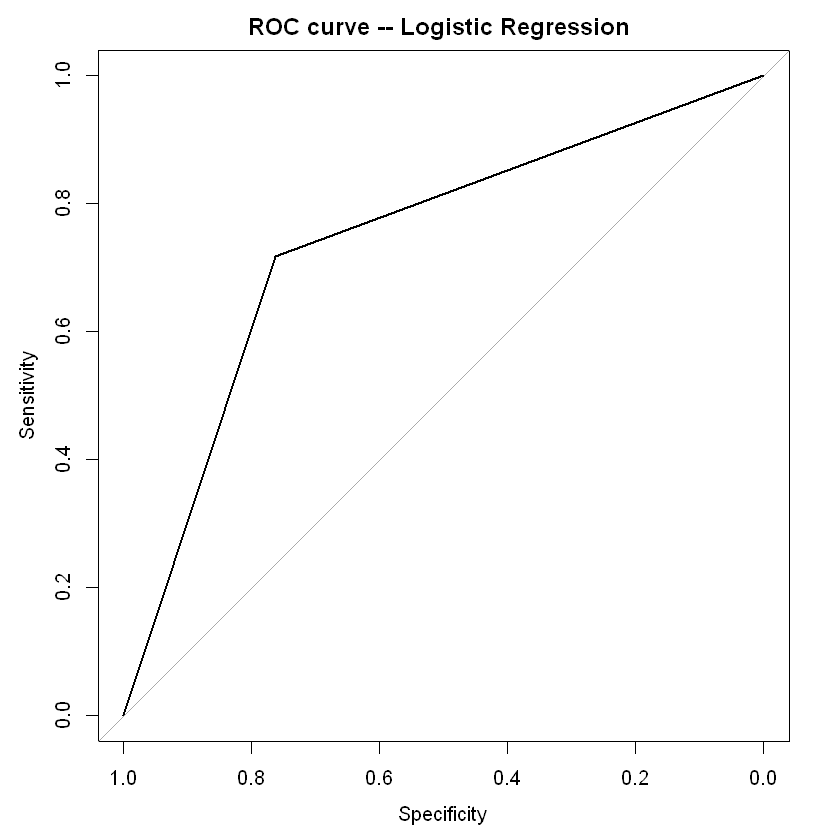

In [424]:
roc_score = roc(actual_data, binary_predictions)
cat("AUC: ", auc(roc_score))
plot(roc_score ,main = "ROC curve -- Logistic Regression ")

#### 6.1.4. Overdispersion tests


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 1.0138, p-value < 2.2e-16
alternative hypothesis: greater


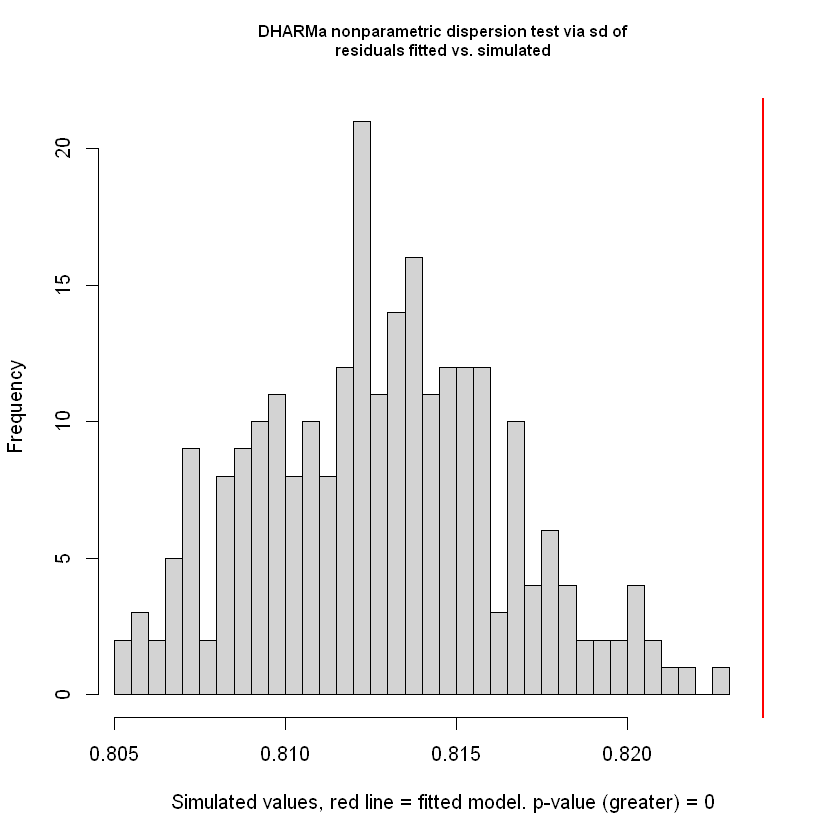

In [425]:
testDispersion(probit_best_bic_model, alternative = "greater")

In [426]:
# Comment: Model is overdispersion

#### 6.1.5. Goodness-of-fit

In [427]:
summary_model = summary(probit_best_bic_model)
cat("residual:", summary_model$deviance, "\n")
cat("dof:", summary_model$df[2], "\n")
cat("goodness-of-fit:", 1- pchisq(summary_model$deviance, df = summary_model$df[2]))

residual: 128977.5 
dof: 202926 
goodness-of-fit: 1

In [428]:
# => Goodness-of-fit

#### 6.1.6. QQ-norm

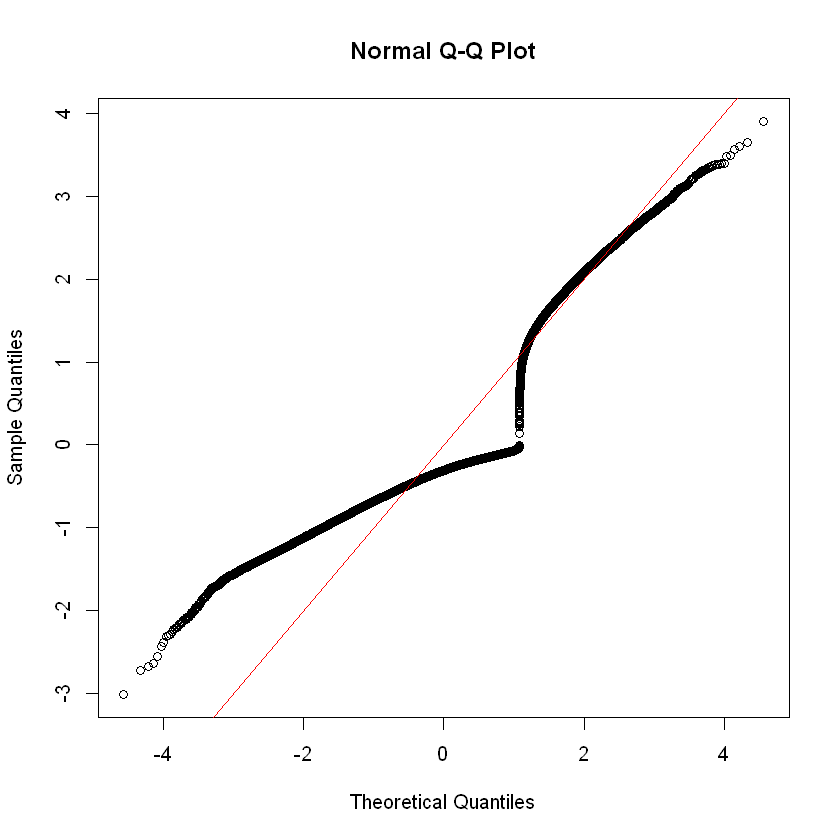

In [429]:
qqnorm(residuals(probit_best_bic_model))
abline(a = 0, b = 1, col = "red")

### 6.2. One-for-all metric function

In [430]:
one_for_all_metric = function(model, new_data, variable_name, binary_threshold = 0.5)
{
    predictions = predict(model, newdata = new_data, type = "response")
    binary_predictions <- ifelse(predictions >= binary_threshold, 1, 0)
    actual_response = new_data[, variable_name]
    
    cat("\n", "Metric 1: ANOVA", "\n")
    print(summary(model))

    cat("\n", "Metric 2: Model performance", "\n")
    confusionMatrix(table(binary_predictions, actual_response))
    evaluate_classification_model(binary_predictions, actual_response)

    cat("\n", "Metric 3: ROC curve - AUC", "\n")
    roc_score = roc(actual_response, binary_predictions)
    cat("AUC: ", auc(roc_score))
    plot(roc_score ,main = "ROC curve -- Logistic Regression ")
    
    cat("\n", "Metric 4: Overdispersion tests", "\n")
    testDispersion(model, alternative = "greater")

    cat("\n", "Metric 5: Goodness-of-fit", "\n")
    summary_model = summary(model)
    cat("residual:", summary_model$deviance, "\n")
    cat("dof:", summary_model$df[2], "\n")
    cat("goodness-of-fit:", 1- pchisq(summary_model$deviance, df = summary_model$df[2]))

    cat("\n", "Metric 6: QQ-norm", "\n")
    qqnorm(residuals(probit_best_bic_model))
    abline(a = 0, b = 1, col = "red")
}

### 6.3. Metric: training_data, 0.5


 Metric 1: ANOVA 

Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + BMI_over_45 + Stroke + HeartDiseaseorAttack + Fruits + 
    HvyAlcoholConsump + GenHlth + PhysHlth + havePhysHlth + DiffWalk + 
    Sex + Age + Education + Income, family = binomial(link = "probit"), 
    data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0131  -0.5486  -0.3069  -0.1394   3.9043  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -4.5267963  0.0516237 -87.688  < 2e-16 ***
HighBP                0.3875133  0.0087915  44.078  < 2e-16 ***
HighChol              0.3055687  0.0082613  36.988  < 2e-16 ***
CholCheck             0.6354588  0.0364101  17.453  < 2e-16 ***
BMI                   0.0423017  0.0007007  60.369  < 2e-16 ***
BMI_over_45          -0.5374998  0.0285703 -18.813  < 2e-16 ***
Stroke                0.0821987  0.0163869   5.016 5.27e-07 ***
HeartDiseaseorAttack  0.1373924

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.5607838
 Metric 4: Overdispersion tests 


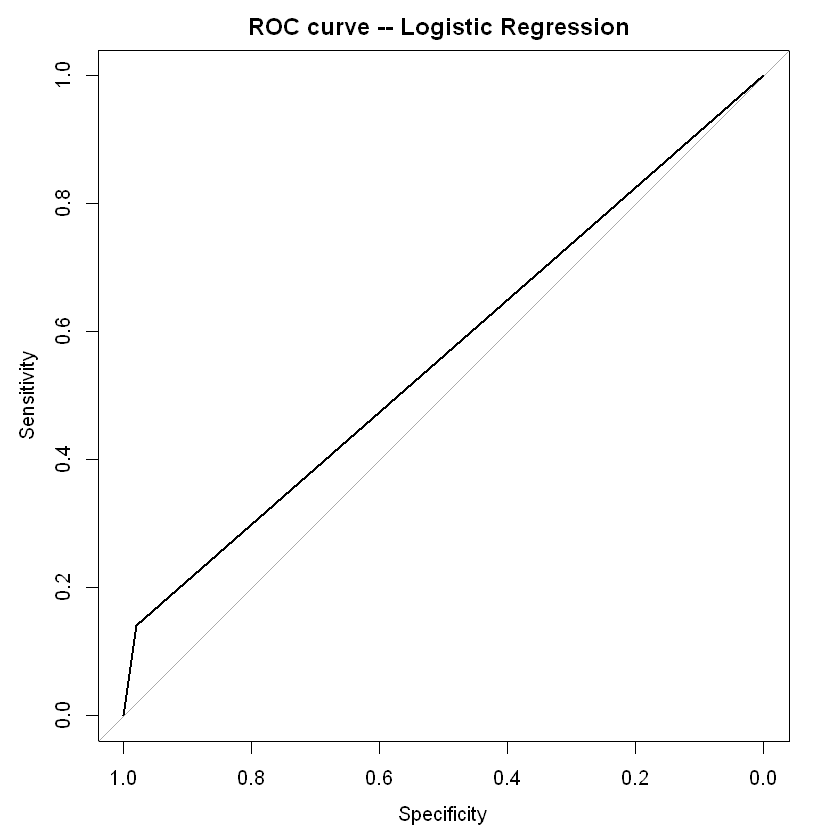


 Metric 5: Goodness-of-fit 
residual: 128977.5 
dof: 202926 
goodness-of-fit: 1
 Metric 6: QQ-norm 


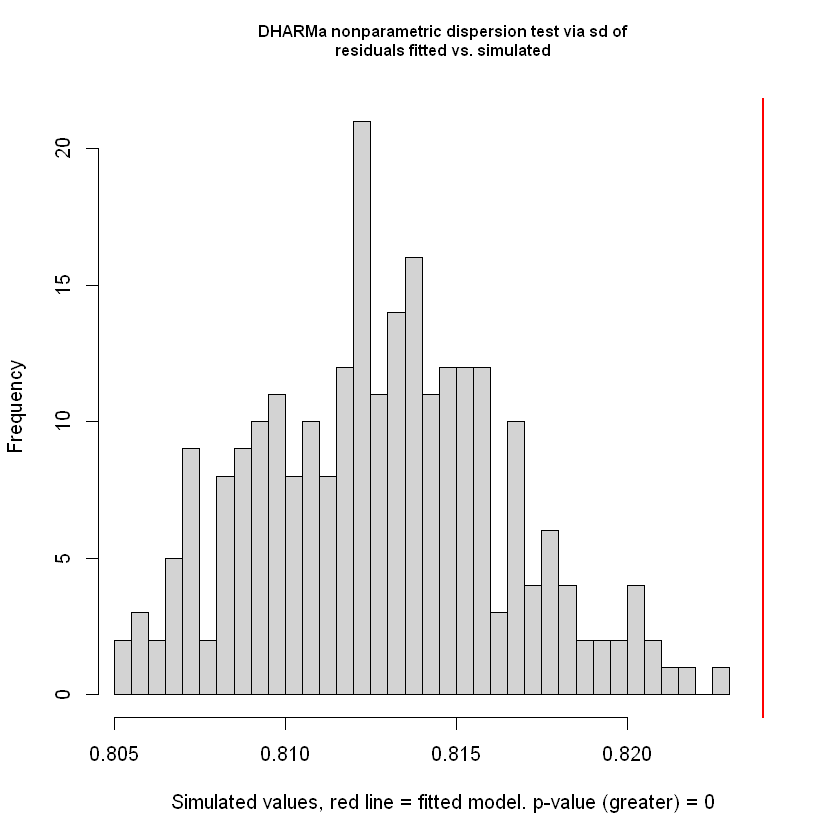

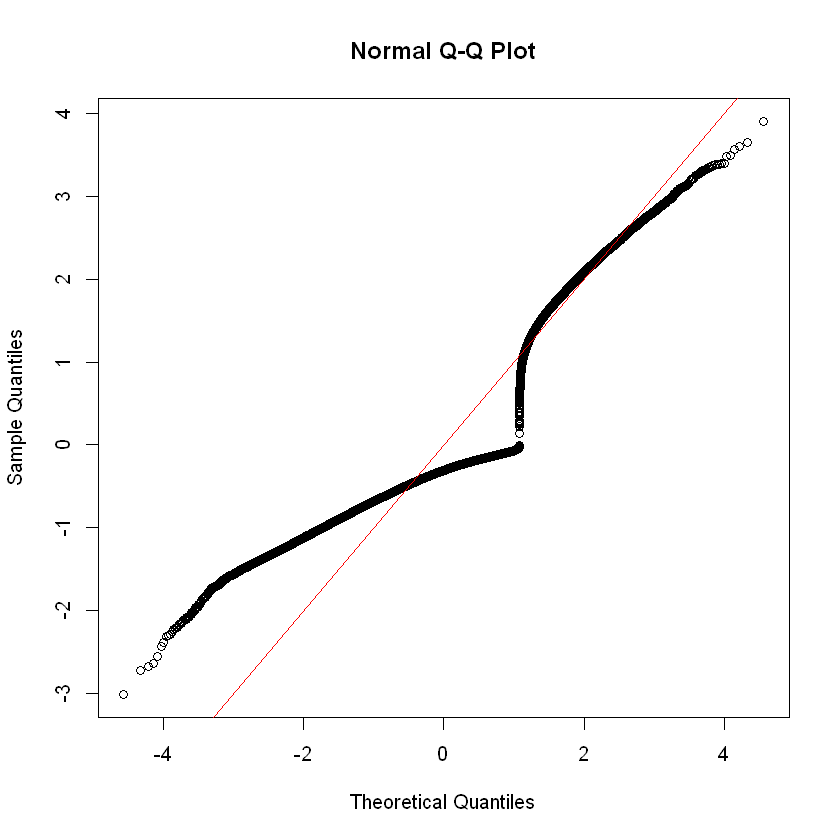

In [431]:
one_for_all_metric(probit_best_bic_model, training_data, "Diabetes_binary")

### 6.4. Metric: testing_data, 0.5


 Metric 1: ANOVA 

Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + BMI_over_45 + Stroke + HeartDiseaseorAttack + Fruits + 
    HvyAlcoholConsump + GenHlth + PhysHlth + havePhysHlth + DiffWalk + 
    Sex + Age + Education + Income, family = binomial(link = "probit"), 
    data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0131  -0.5486  -0.3069  -0.1394   3.9043  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -4.5267963  0.0516237 -87.688  < 2e-16 ***
HighBP                0.3875133  0.0087915  44.078  < 2e-16 ***
HighChol              0.3055687  0.0082613  36.988  < 2e-16 ***
CholCheck             0.6354588  0.0364101  17.453  < 2e-16 ***
BMI                   0.0423017  0.0007007  60.369  < 2e-16 ***
BMI_over_45          -0.5374998  0.0285703 -18.813  < 2e-16 ***
Stroke                0.0821987  0.0163869   5.016 5.27e-07 ***
HeartDiseaseorAttack  0.1373924

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.5611151
 Metric 4: Overdispersion tests 


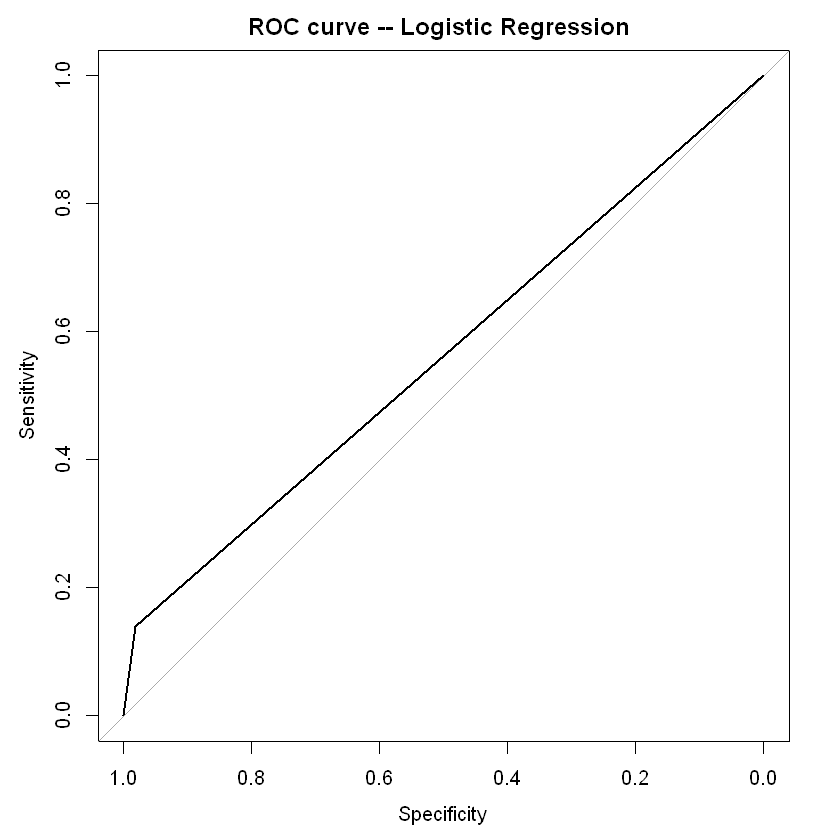


 Metric 5: Goodness-of-fit 
residual: 128977.5 
dof: 202926 
goodness-of-fit: 1
 Metric 6: QQ-norm 


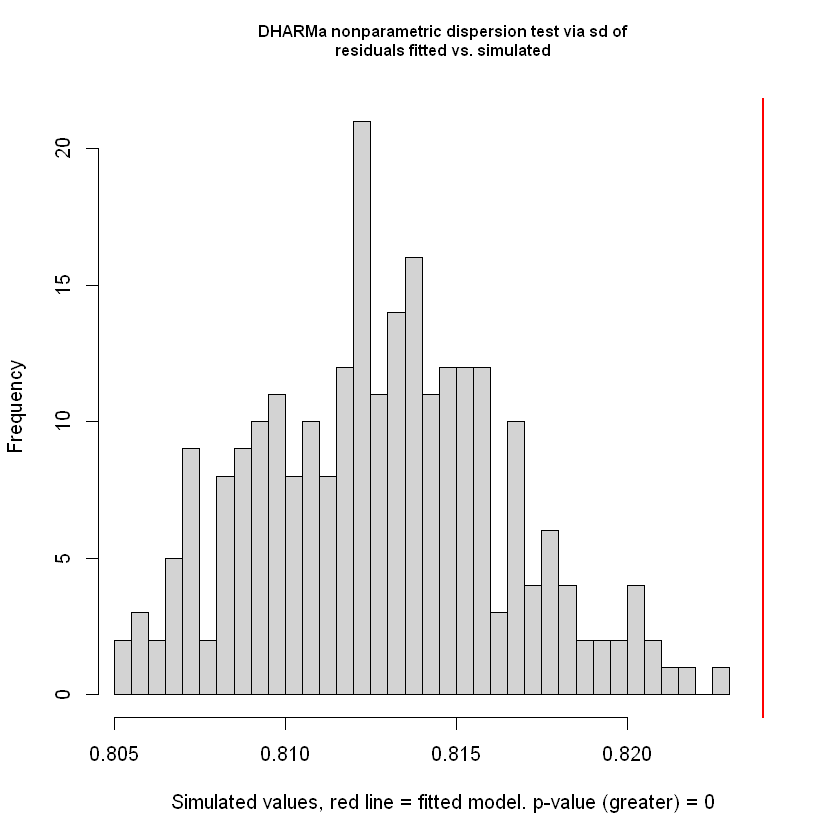

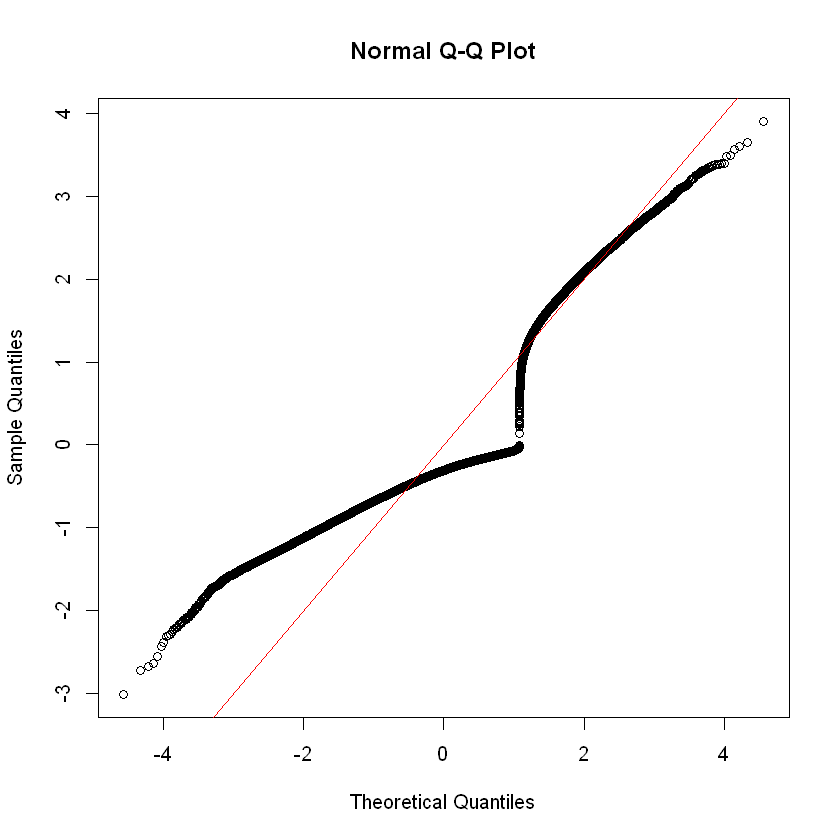

In [432]:
one_for_all_metric(probit_best_bic_model, testing_data, "Diabetes_binary")

### 6.5. Metric: training_data, 0.17


 Metric 1: ANOVA 

Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + BMI_over_45 + Stroke + HeartDiseaseorAttack + Fruits + 
    HvyAlcoholConsump + GenHlth + PhysHlth + havePhysHlth + DiffWalk + 
    Sex + Age + Education + Income, family = binomial(link = "probit"), 
    data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0131  -0.5486  -0.3069  -0.1394   3.9043  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -4.5267963  0.0516237 -87.688  < 2e-16 ***
HighBP                0.3875133  0.0087915  44.078  < 2e-16 ***
HighChol              0.3055687  0.0082613  36.988  < 2e-16 ***
CholCheck             0.6354588  0.0364101  17.453  < 2e-16 ***
BMI                   0.0423017  0.0007007  60.369  < 2e-16 ***
BMI_over_45          -0.5374998  0.0285703 -18.813  < 2e-16 ***
Stroke                0.0821987  0.0163869   5.016 5.27e-07 ***
HeartDiseaseorAttack  0.1373924

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.7434077
 Metric 4: Overdispersion tests 


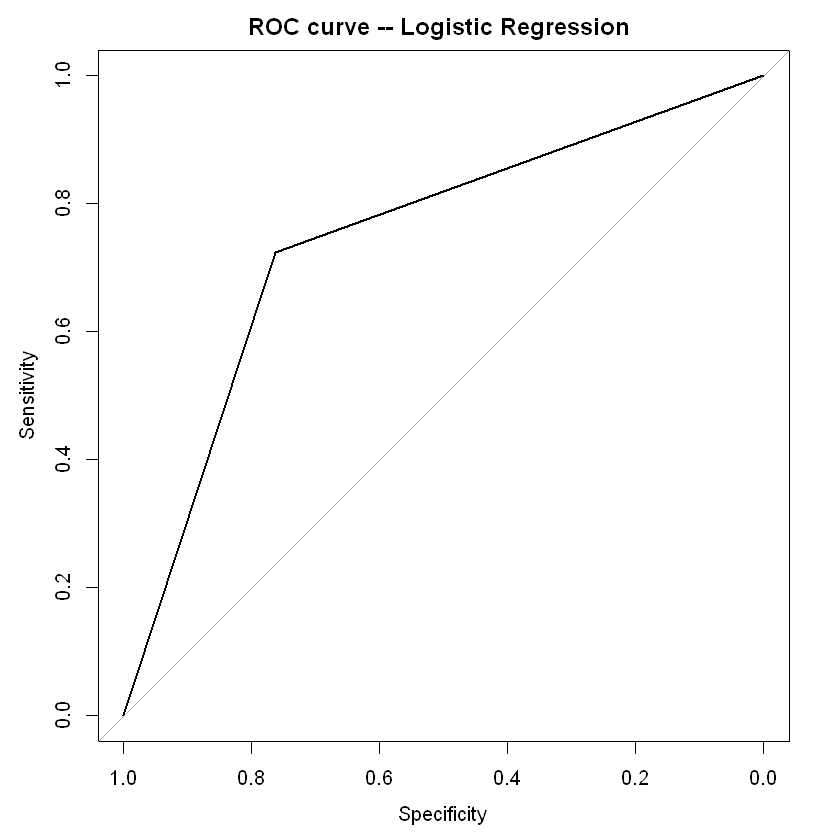


 Metric 5: Goodness-of-fit 
residual: 128977.5 
dof: 202926 
goodness-of-fit: 1
 Metric 6: QQ-norm 


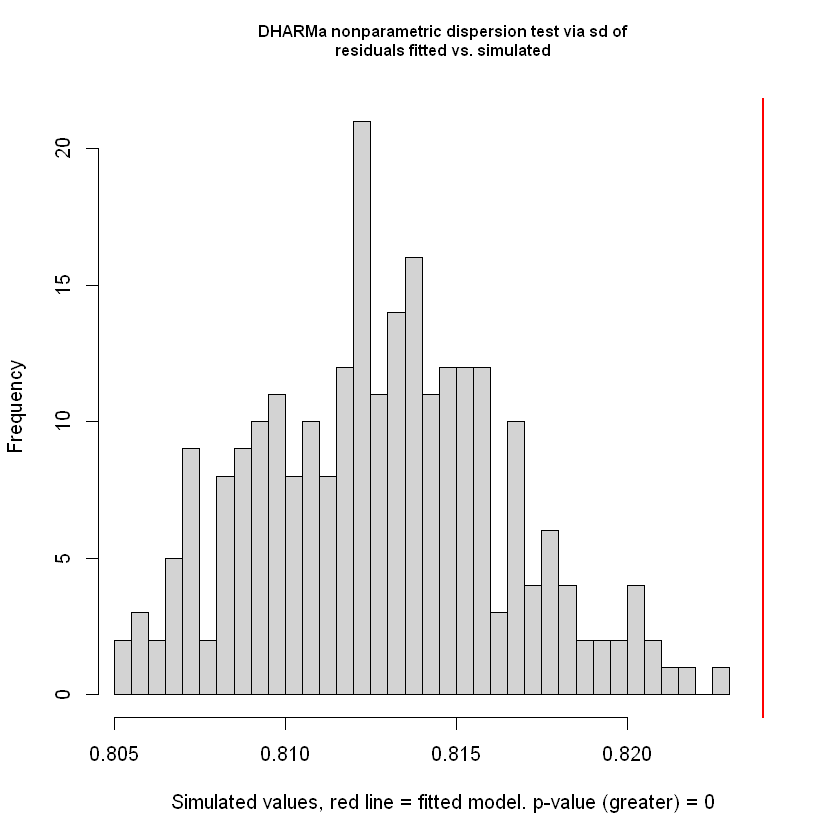

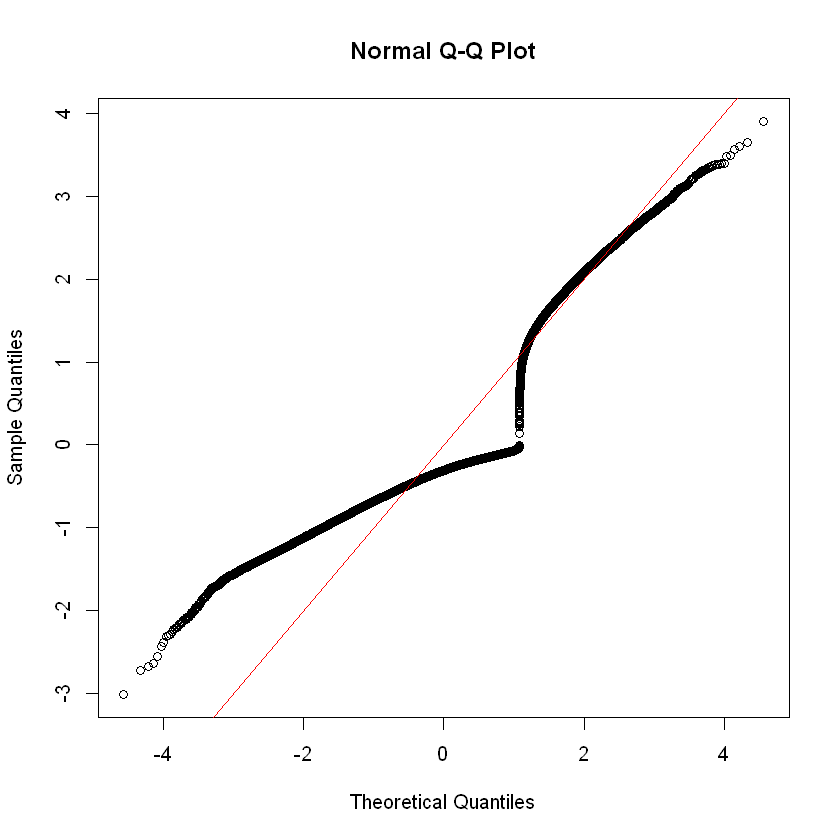

In [433]:
one_for_all_metric(probit_best_bic_model, training_data, "Diabetes_binary", 0.17)


 Metric 1: ANOVA 

Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + BMI_over_45 + Stroke + HeartDiseaseorAttack + Fruits + 
    HvyAlcoholConsump + GenHlth + PhysHlth + havePhysHlth + DiffWalk + 
    Sex + Age + Education + Income, family = binomial(link = "probit"), 
    data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0131  -0.5486  -0.3069  -0.1394   3.9043  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -4.5267963  0.0516237 -87.688  < 2e-16 ***
HighBP                0.3875133  0.0087915  44.078  < 2e-16 ***
HighChol              0.3055687  0.0082613  36.988  < 2e-16 ***
CholCheck             0.6354588  0.0364101  17.453  < 2e-16 ***
BMI                   0.0423017  0.0007007  60.369  < 2e-16 ***
BMI_over_45          -0.5374998  0.0285703 -18.813  < 2e-16 ***
Stroke                0.0821987  0.0163869   5.016 5.27e-07 ***
HeartDiseaseorAttack  0.1373924

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.7407196
 Metric 4: Overdispersion tests 


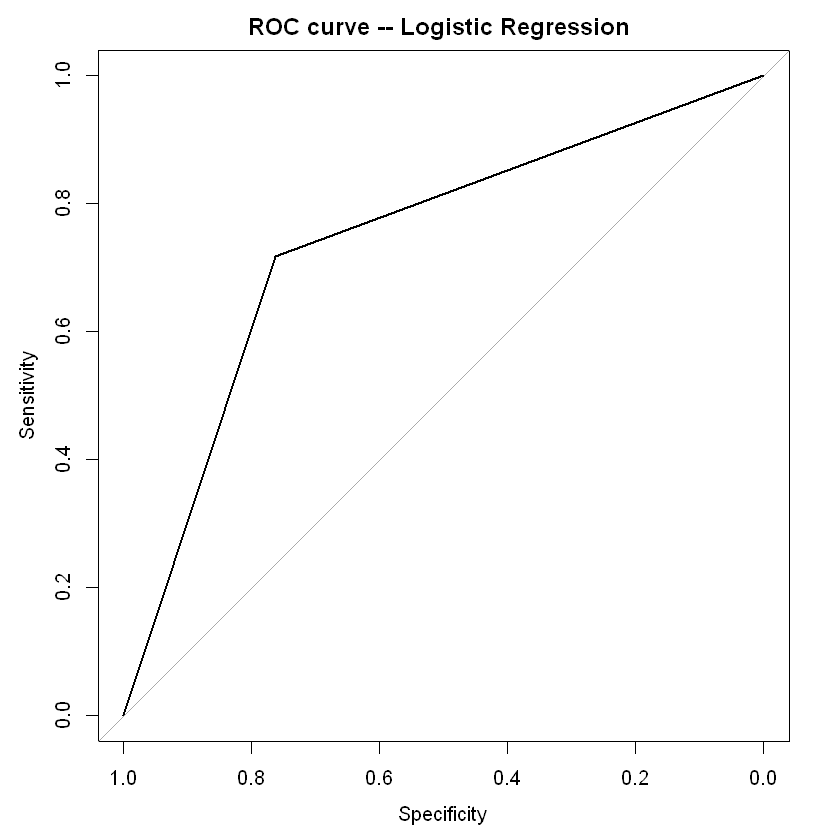


 Metric 5: Goodness-of-fit 
residual: 128977.5 
dof: 202926 
goodness-of-fit: 1
 Metric 6: QQ-norm 


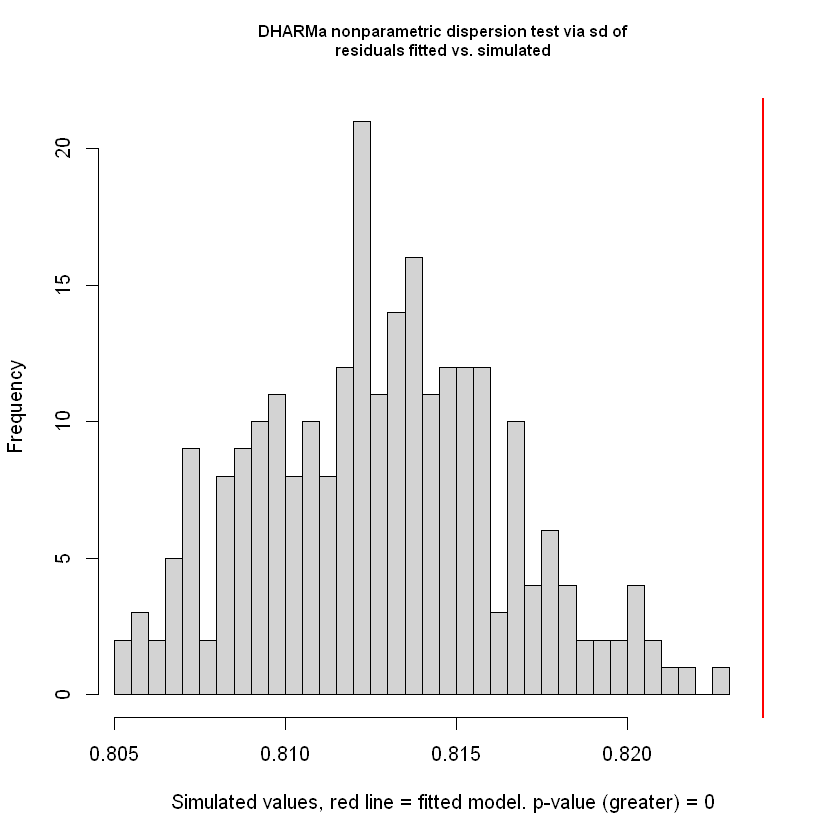

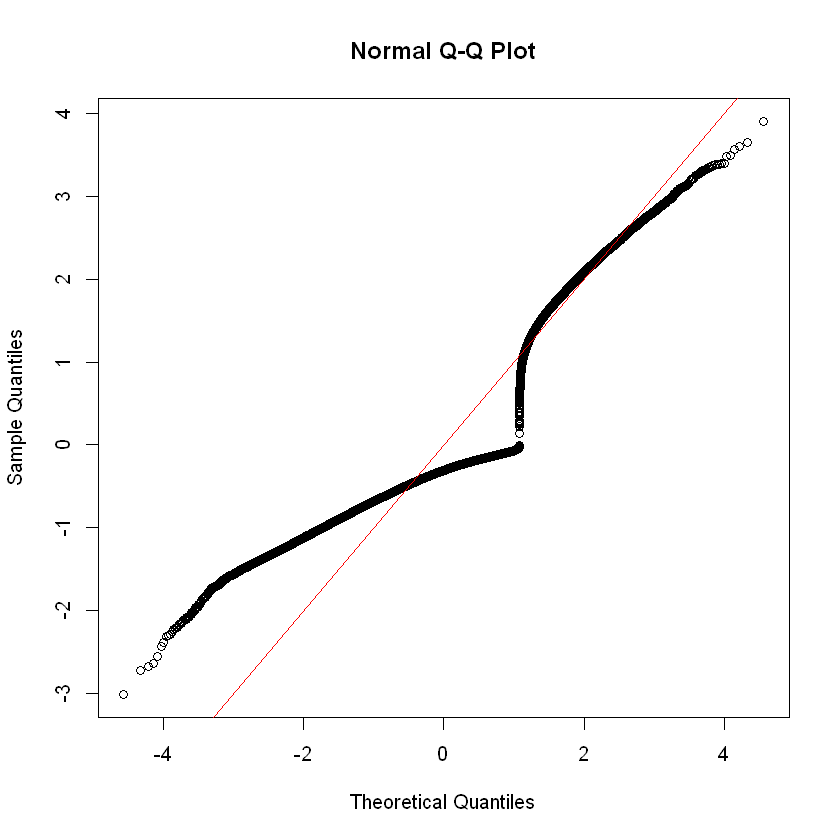

In [434]:
one_for_all_metric(probit_best_bic_model, testing_data, "Diabetes_binary", 0.17)

## 7. Model improvement 01

### 7.1. Problem

In [287]:
# Overdispersion
# Clumping data: BMI, MentHlth, PhysHlth

### 7.2. Model improvement

In [294]:
probit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
                           HeartDiseaseorAttack + Fruits + HvyAlcoholConsump + GenHlth + 
                           PhysHlth + DiffWalk + Sex + Age + Education + Income, data = training_data, family = quasibinomial(link = "probit"))

In [295]:
summary(probit_best_bic_model)


Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + Stroke + HeartDiseaseorAttack + Fruits + HvyAlcoholConsump + 
    GenHlth + PhysHlth + DiffWalk + Sex + Age + Education + Income, 
    family = quasibinomial(link = "probit"), data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0386  -0.5493  -0.3091  -0.1442   3.8405  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -4.3072006  0.0486837 -88.473  < 2e-16 ***
HighBP                0.3958947  0.0085018  46.566  < 2e-16 ***
HighChol              0.3100992  0.0079931  38.796  < 2e-16 ***
CholCheck             0.6383683  0.0352825  18.093  < 2e-16 ***
BMI                   0.0344412  0.0005492  62.714  < 2e-16 ***
Stroke                0.0808949  0.0158641   5.099 3.41e-07 ***
HeartDiseaseorAttack  0.1379204  0.0112477  12.262  < 2e-16 ***
Fruits               -0.0296540  0.0079327  -3.738 0.000185 ***
HvyAlcoholConsu

## X. Reserved

#### 3.2.1. BMI

In [56]:
summary(df$BMI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   24.00   27.00   28.38   31.00   98.00 

In [57]:
# We see maximum value of BMI is 98 which is abnormal.

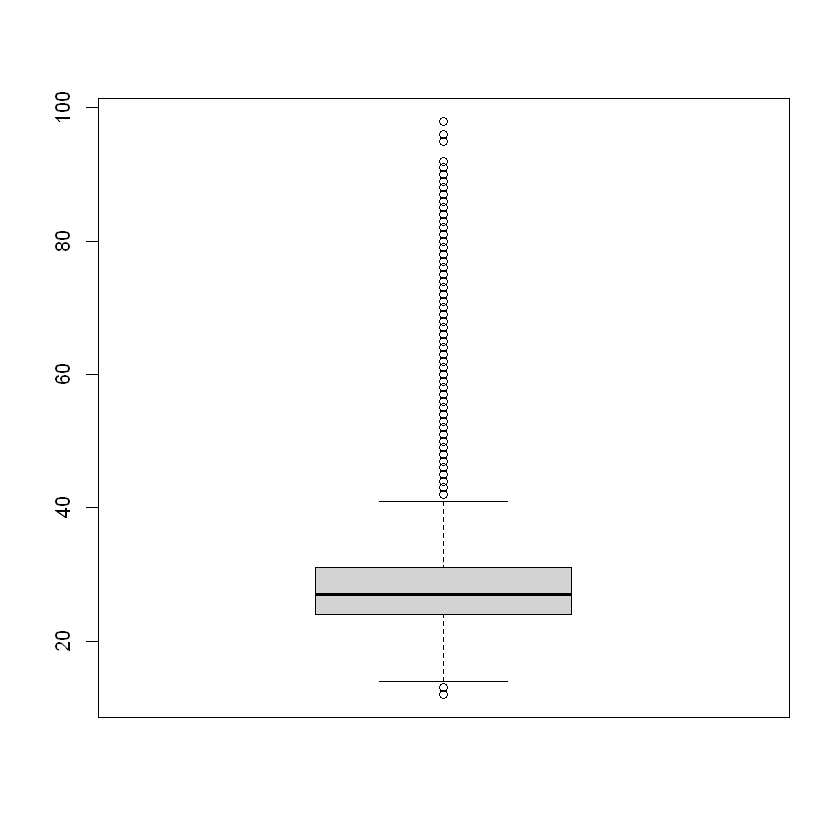

In [58]:
# Boxplot data
boxplot(df$BMI)

In [59]:
# We see that dataset has several outliers in "BMI" column.

In [60]:
BMI_q1 = quantile(df$BMI, 0.25)
BMI_q3 = quantile(df$BMI, 0.75)
BMI_iqr = BMI_q3 - BMI_q1
BMI_lower_bound = BMI_q1 - 1.5 * BMI_iqr
BMI_upper_bound = BMI_q3 + 1.5 * BMI_iqr

In [61]:
BMI_outlier_df = df[df$BMI < BMI_lower_bound | df$BMI > BMI_upper_bound, ]

In [62]:
nrow(BMI_outlier_df) / nrow(df) * 100

[1] 3.881662

In [63]:
# We see that the percentage of outliers is approximately about 4%.
# Extreme values of BMI that higher 40 could affect the model.

# To standardize the BMI index, WHO recommendations is used.
# Reference: https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations

# |   BMI     | Nutritional Status | Categorical |
# |-----------|--------------------|-------------|
# | < 18.5    | Underweight        |      1      |
# | 18.5–24.9 | Normal weight      |      2      |
# | 25.0–29.9 | Pre-obesity        |      3      |
# | 30.0–34.9 | Obesity class I    |      4      |
# | 35.0–39.9 | Obesity class II   |      5      |
# | > 40      | Obesity class III  |      6      |

new_column = rep(0, nrow(df))
BMI_index = which(colnames(df) == "BMI")
df_std_1 = cbind(df[,1:BMI_index], StdBMI = new_column, df[,(BMI_index + 1):ncol(df)])

In [64]:
df_std_1

Index,HighBP,HighChol,CholCheck,BMI,StdBMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,0,1,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,0,1,0,0,1,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,0,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,0,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,0,1,0,0,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,0,1,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,0,1,0,0,1,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,0,1,0,1,0,...,0,5,30,30,1,0,9,5,1,1


In [65]:
df_std_1[df_std_1$BMI < 18.5, ]$StdBMI = 1
df_std_1[df_std_1$BMI >= 18.5 & df_std_1$BMI < 25, ]$StdBMI = 2
df_std_1[df_std_1$BMI >= 25 & df_std_1$BMI < 30, ]$StdBMI = 3
df_std_1[df_std_1$BMI >= 30 & df_std_1$BMI < 35, ]$StdBMI = 4
df_std_1[df_std_1$BMI >= 35 & df_std_1$BMI < 40, ]$StdBMI = 5
df_std_1[df_std_1$BMI >= 40, ]$StdBMI = 6

In [66]:
df_std_1

Index,HighBP,HighChol,CholCheck,BMI,StdBMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,6,1,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,3,1,0,0,1,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,3,0,0,0,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,3,0,0,0,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,2,0,0,0,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,3,1,0,0,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,4,1,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,3,1,0,0,1,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,4,1,0,1,0,...,0,5,30,30,1,0,9,5,1,1


In [67]:
table(df_std_1$StdBMI)


    1     2     3     4     5     6 
 3127 68953 93749 53451 20663 13737 

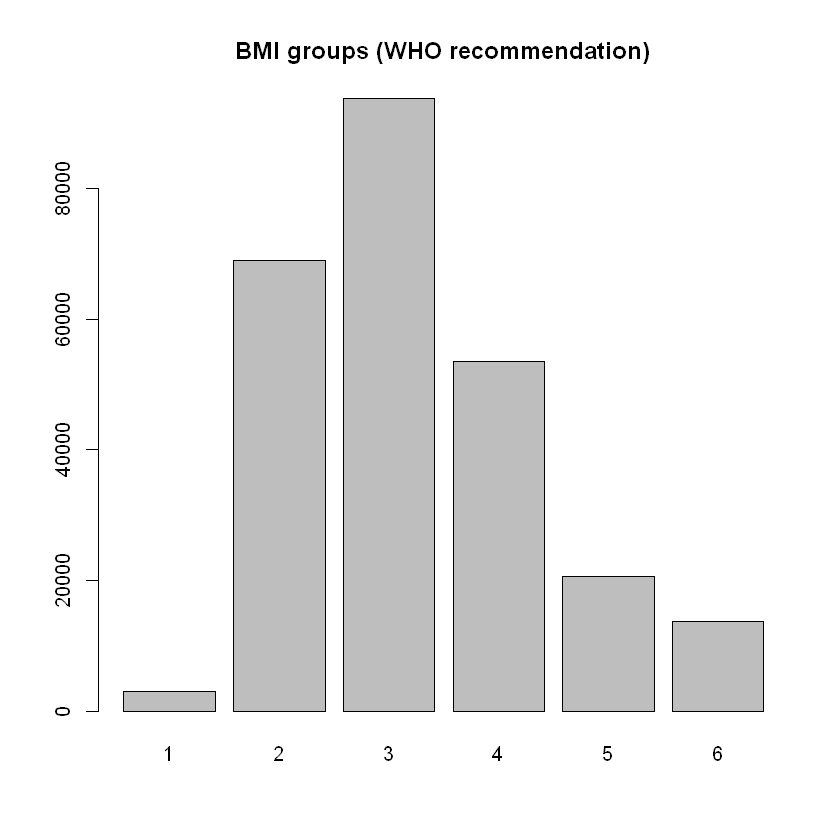

In [68]:
barplot(table(df_std_1$StdBMI), main="BMI groups (WHO recommendation)")

In [69]:
str(df_std_1)

'data.frame':	253680 obs. of  24 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : num  6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : 

In [70]:
# Comment: StdBMI data are categorical.

In [71]:
# We now must validate the meaningful of this standardizatiton with response variable.

In [72]:
table(df_std_1$StdBMI, df_std_1$Diabetes_binary)

   
        0     1
  1  2958   169
  2 65025  3928
  3 83057 10692
  4 43170 10281
  5 14994  5669
  6  9130  4607

In [73]:
chisq.test(table(df_std_1$StdBMI, df_std_1$Diabetes_binary))


	Pearson's Chi-squared test

data:  table(df_std_1$StdBMI, df_std_1$Diabetes_binary)
X-squared = 13387, df = 5, p-value < 2.2e-16


In [74]:
# Comment: A p-value close to 0 shows that there is a difference between diabetes rates among BMI groups.

#### BMI output: df_std_1

In [75]:
str(df_std_1)

'data.frame':	253680 obs. of  24 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : num  6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : 

#### 3.2.2. MentHlth

In [76]:
summary(df_std_1$MentHlth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.185   2.000  30.000 

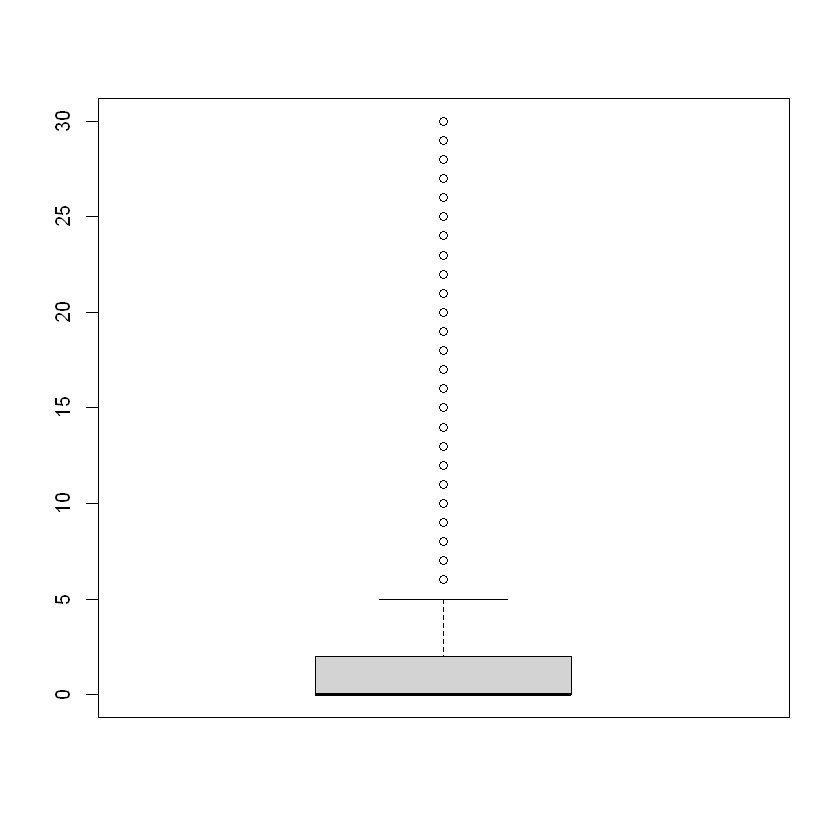

In [77]:
boxplot(df_std_1$MentHlth)

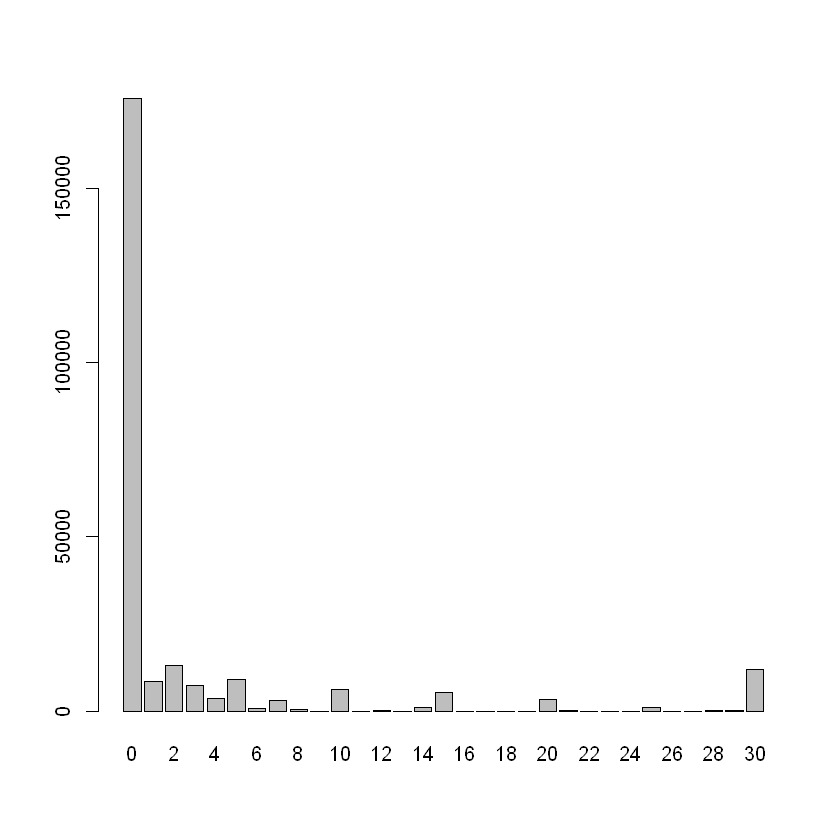

In [78]:
barplot(table(df_std_1$MentHlth))

In [79]:
# We see data with value ZERO is overwhelmed compared to other values.
# Create a binary feature indicates that whether a person has mental health problem.

In [80]:
new_column = rep(0, nrow(df_std_1))
MentHlth_index = which(colnames(df_std_1) == "MentHlth")
df_std_2 = cbind(df_std_1[,1:MentHlth_index], BoolMentHlth = new_column, df_std_1[,(MentHlth_index+1):ncol(df_std_1)])

In [81]:
df_std_2[df_std_2$MentHlth > 0, ]$BoolMentHlth = 1

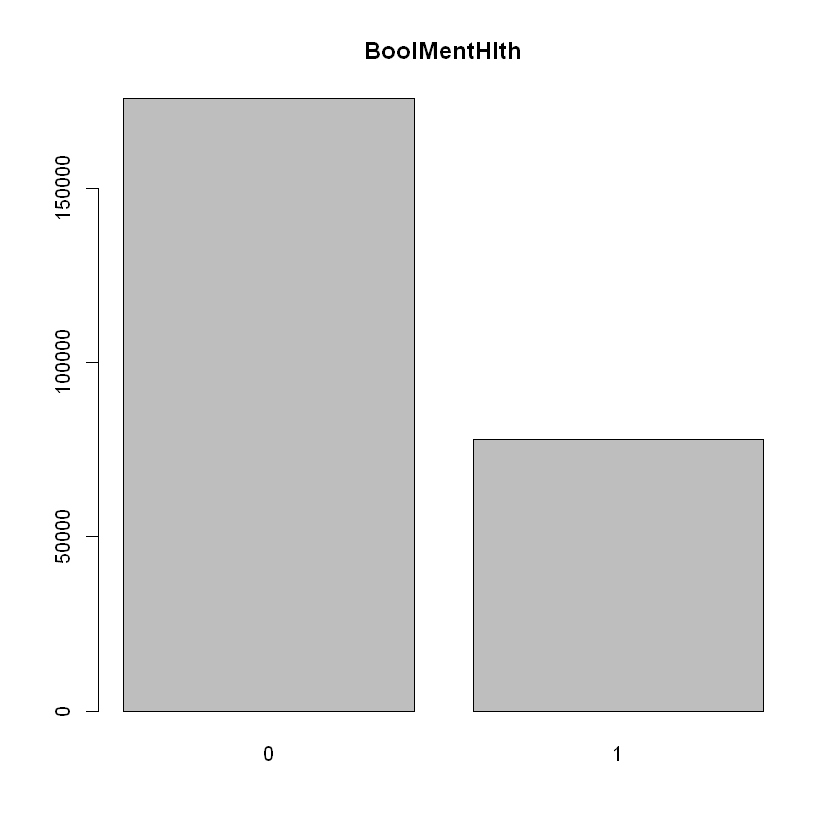

In [82]:
barplot(table(df_std_2$BoolMentHlth), main="BoolMentHlth")

In [83]:
chisq.test(table(df_std_2$BoolMentHlth, df_std_2$Diabetes_binary))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(df_std_2$BoolMentHlth, df_std_2$Diabetes_binary)
X-squared = 178.24, df = 1, p-value < 2.2e-16


In [84]:
# Comment: A p-value close to 0 shows that there is a difference between diabetes rates among BoolMentHlth groups.

#### MentHlth output: df_std_2

In [85]:
str(df_std_2)

'data.frame':	253680 obs. of  25 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : num  6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ BoolMentHlth        : 

#### 3.2.3. PhysHlth

In [86]:
summary(df_std_2$PhysHlth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   4.242   3.000  30.000 

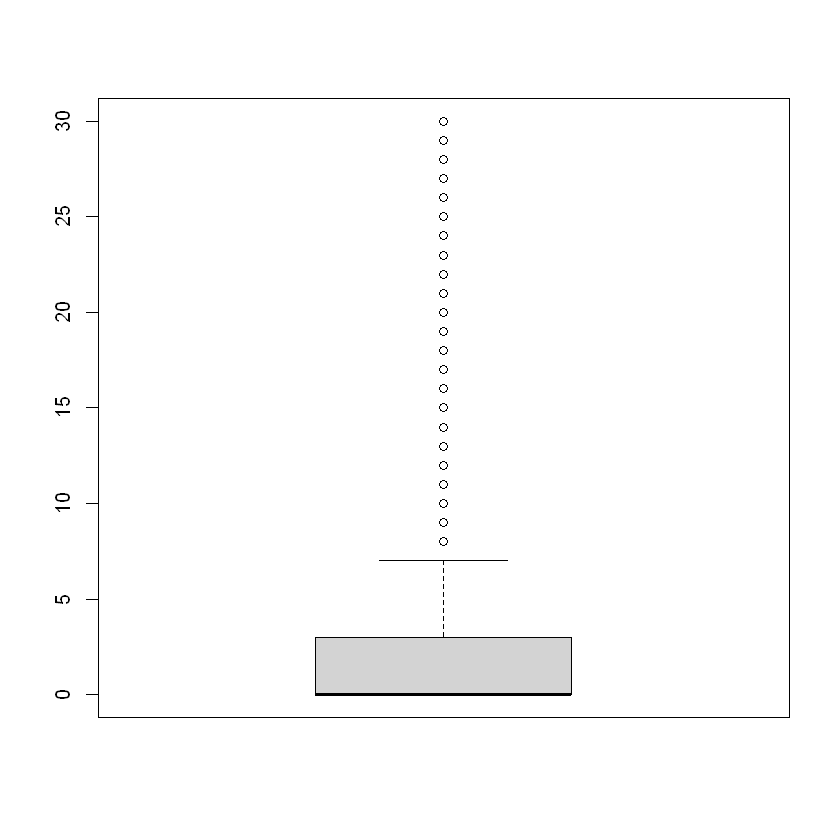

In [87]:
boxplot(df_std_1$PhysHlth)

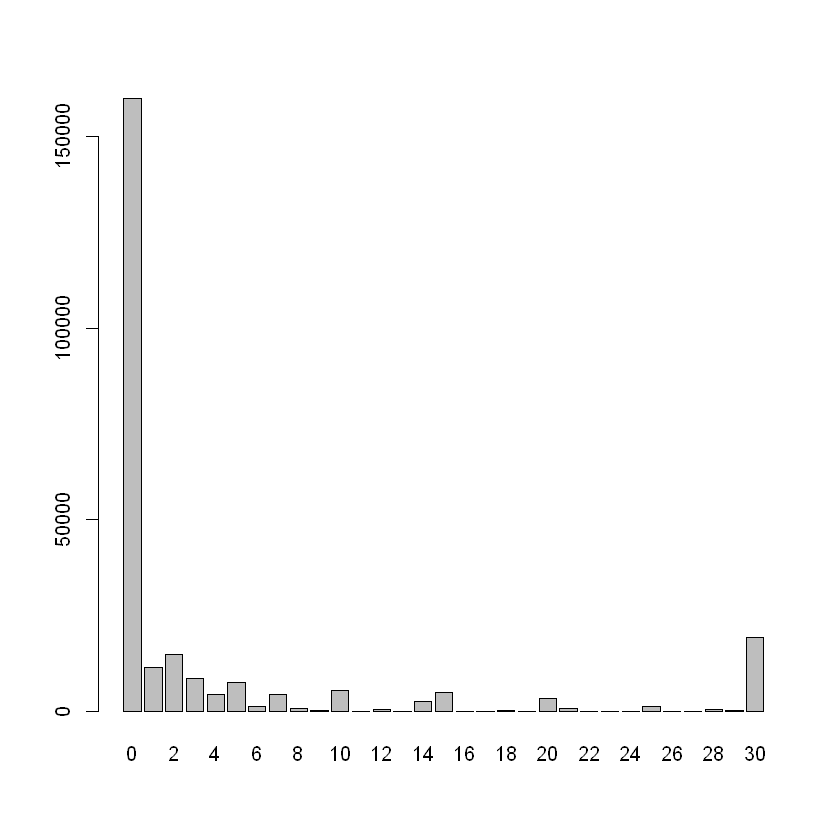

In [88]:
barplot(table(df_std_2$PhysHlth))

In [89]:
# We see data with value ZERO is overwhelmed compared to other values.
# Create a binary feature indicates that whether a person has physical health problem.

In [90]:
new_column = rep(0, nrow(df_std_2))
PhysHlth_index = which(colnames(df_std_2) == "PhysHlth")
df_std_3 = cbind(df_std_2[,1:PhysHlth_index], BoolPhysHlth = new_column, df_std_2[,(PhysHlth_index+1):ncol(df_std_2)])

In [91]:
df_std_3[df_std_3$PhysHlth > 0, ]$BoolPhysHlth = 1

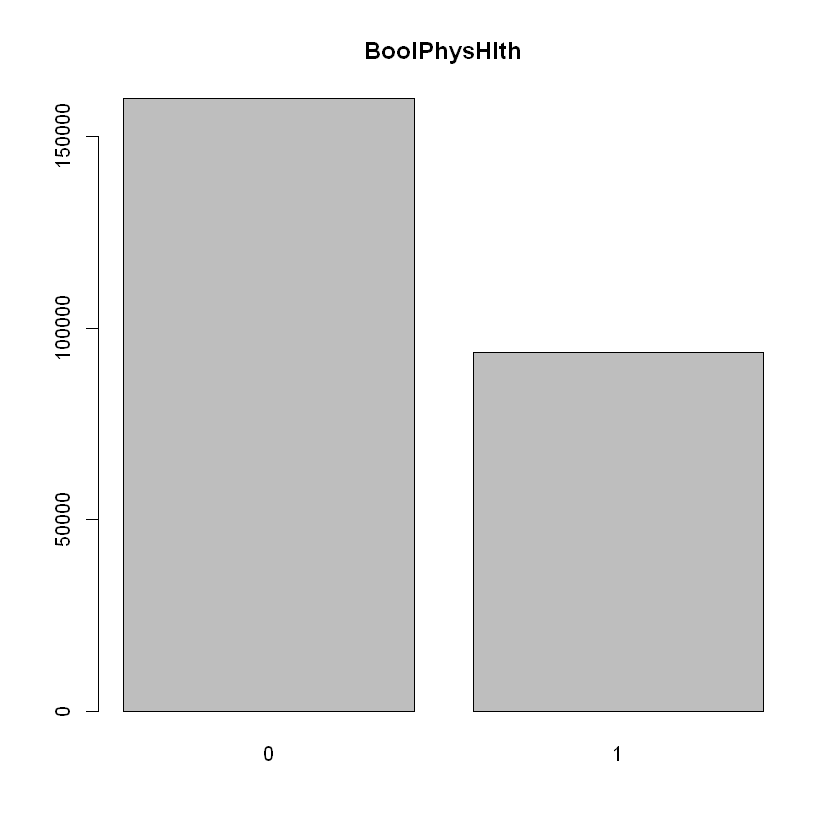

In [92]:
barplot(table(df_std_3$BoolPhysHlth), main="BoolPhysHlth")

In [93]:
chisq.test(table(df_std_3$BoolPhysHlth, df_std_3$Diabetes_binary))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(df_std_3$BoolPhysHlth, df_std_3$Diabetes_binary)
X-squared = 4364, df = 1, p-value < 2.2e-16


In [94]:
# Comment: A p-value close to 0 shows that there is a difference between diabetes rates among BoolPhysHlth groups.

#### PhysHlth output: df_std_3

In [95]:
str(df_std_3)

'data.frame':	253680 obs. of  26 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : num  6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ BoolMentHlth        : 

## TEST